#*machine learning project about  classification of the SVHN dataset - Pies-team*
---
**ML_Project_SVHN-Classifier_YandexAcademyIntensive**

Высоцкий С.

Канаев С.

Гуревич П.

Ширкунова М.

##**Introduction**

**SVHN — относительно новый набор данных, новый шаг от датасета MNIST и дополнение к другим популярным computer vision datasets. Цель данной проектной работы это исследование методов анализа датасета SVHN. Эта проектная работа призвана показать различные способы повышения результатов(score) на тестовых данных. Проверим общие используемые методы предварительной обработки, а также сделаем некоторый обзор используемых современных архитектур нейронных сетей. Данная работа является, прежде всего, исследовательской, в ней присутвуют сслыки на различные статьи, в том числе на известнызх ученых в области анализа данных.**

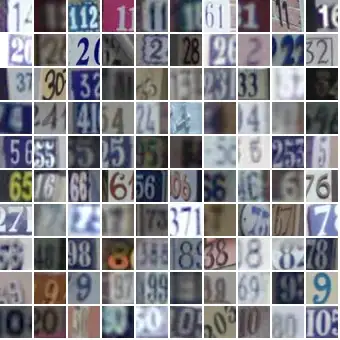

**Информация о наборе данных**

*Street View House Numbers (SVHN) — это набор данных изображений из нашей жизни - цифры с номеров домов, используемый для разработки алгоритмов машинного обучения и распознавания объектов. Это один из наиболее часто используемых эталонных наборов данных, так как он требует предварительную обработку и форматирование данных. Хотя он и имеет некоторое сходство с MNIST , где изображения представляют собой небольшие обрезанные цифры, SVHN включает на порядок больше размеченных данных (более 600 000 изображений цифр). Также это происходит из-за значительно более сложной реальной проблемы распознавания цифр числа находятся на естественной сцене - на домах! На изображениях отсутствует нормализация контраста, картинки содержат перекрывающиеся цифры и отвлекающие элементы, что делает анализ датасета гораздо более сложной задачей по сравнению с MNIST*

**Далее приводятся разделы о проведенной нами работы:**

**Preprocessing Data - import and aug**

- **Import**

  *- импортирование библиотек, функций и данных. Данные импортируется из диска - скачаны заранее на диск.*

- **Researches Part 1**

  *- раздел исследований в области аугментаций. Ссылки на статьи про батчнорм и автоаугментацию. Приведены исследования в области известных политик аугментации над датасетом SVHN.*

- **Preprocessing Data**

  *- основной раздел обработки датасета - приведены - Блюр-аугментация ко всем данным - перевод датасета в картинки и применение к ним автоаугментации - объявляения датагенераторов - использование батчнорма для датасетов.*

**Prrocessing Data - net**

**раздел написание нейросетей*

- **Convolution(only) net -**

  **ALexNet(0)**

  **ConvNet(1)**

  **ConvNet(2)**

- **Net with skip-connection** -

  **ResNet (3)**

  **ResNet BN (4)**

  **ConvNet(1) with s-c - (5)**

  **WideResNet (28-10) - (6)**

---

**Если вы нуждаетесь: наилучшие показатели в коцне работы - там также приведена модель и аугментация, на которых выбит наш лучший результат.**

---

**Запуск тестовых данных выполнялся на аккаунте Пети Гуревича. Считать данную точность на kaggle - нашей.**

##**Import(Data and Frameworks)**

**Импортирование библиотек:**

In [ ]:
import pandas as pd
import numpy as np
import cv2
# import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import keras
# from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, MaxPooling2D, Dropout
from keras import layers, Model
%matplotlib inline
from tensorflow.python.framework import ops

from PIL import Image, ImageEnhance, ImageOps
import random
import torch
import torch
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
# from tensorflow_models.vision.augment import AutoAugment
import torch
import tensorflow as tf



In [ ]:
# !pip3 install -q tf-models-nightly

In [ ]:
# !pip install -U "tensorflow==2.11.0.*"
# !pip install -U "tf-models-nightly==2.11.0.*"
# import tensorflow as tf
# import tensorflow_models as tfm

In [ ]:
# import tensorflow_models as tfm

In [ ]:
# from tensorflow_models import vision

**Импортирование функций:**

In [ ]:
def BatchNorm(train_images, train_labels):
  batch_size = 512
  train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
  train_dataset = train_dataset.shuffle(buffer_size = 1024, reshuffle_each_iteration=True)
  train_dataset = train_dataset.batch(batch_size)
  return train_dataset

**Импортирование данных SVHN**


> - *скачивание c директории Google-Colab:*

In [ ]:
# data_train = pd.read_pickle(r'data_train')
# data_test = pd.read_pickle(r'data_test')
# meta = pd.read_pickle(r'meta')

> - *скачивание с Google-Drive*
  *(чтобы использовать просто скачайте в Google-Drive - ссылка будет одинаковой):*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_train = pd.read_pickle('drive/My Drive/data_train')
data_test = pd.read_pickle('drive/My Drive/data_test')
meta = pd.read_pickle('drive/My Drive/meta')

>- *скачивание с Kaggle*

In [ ]:
#
#     import from Kaggle - в разработке
#

---

**Посмотрим на данные:**

In [ ]:
#data_train

In [ ]:
#meta

In [ ]:
data_test

{'section': 'test', 'images': array([[[[ 67.,  73.,  87.],
          [ 74.,  78.,  92.],
          [ 76.,  78.,  94.],
          ...,
          [ 57.,  64.,  81.],
          [ 54.,  61.,  77.],
          [ 49.,  56.,  72.]],
 
         [[ 68.,  74.,  88.],
          [ 72.,  76.,  92.],
          [ 73.,  75.,  93.],
          ...,
          [ 66.,  75.,  89.],
          [ 65.,  72.,  88.],
          [ 61.,  69.,  84.]],
 
         [[ 68.,  74.,  88.],
          [ 70.,  74.,  90.],
          [255., 255., 255.],
          ...,
          [ 85.,  91., 101.],
          [ 86.,  91., 101.],
          [ 84.,  89.,  99.]],
 
         ...,
 
         [[ 60.,  73.,  86.],
          [ 57.,  69.,  84.],
          [255., 255., 255.],
          ...,
          [ 81.,  87.,  97.],
          [ 82.,  90.,  98.],
          [ 83.,  90.,  96.]],
 
         [[ 58.,  70.,  84.],
          [ 52.,  64.,  79.],
          [ 48.,  59.,  76.],
          ...,
          [ 71.,  76.,  90.],
          [ 72.,  79.,  89.]

*Посмотрев на данные, мы увидели, что они имеют тип - **словарь**, считаем нужные нам для последующей работы данные.*

*Переведем в значения данных для преобразования в RGBA, выведем объекты - картинки из full-train-выборки:*

In [ ]:
train_images_full, train_labels_full, test_images = data_train['images'] / 255.0, data_train['labels'], data_test['images'] / 255.0
meta = meta['label_names']


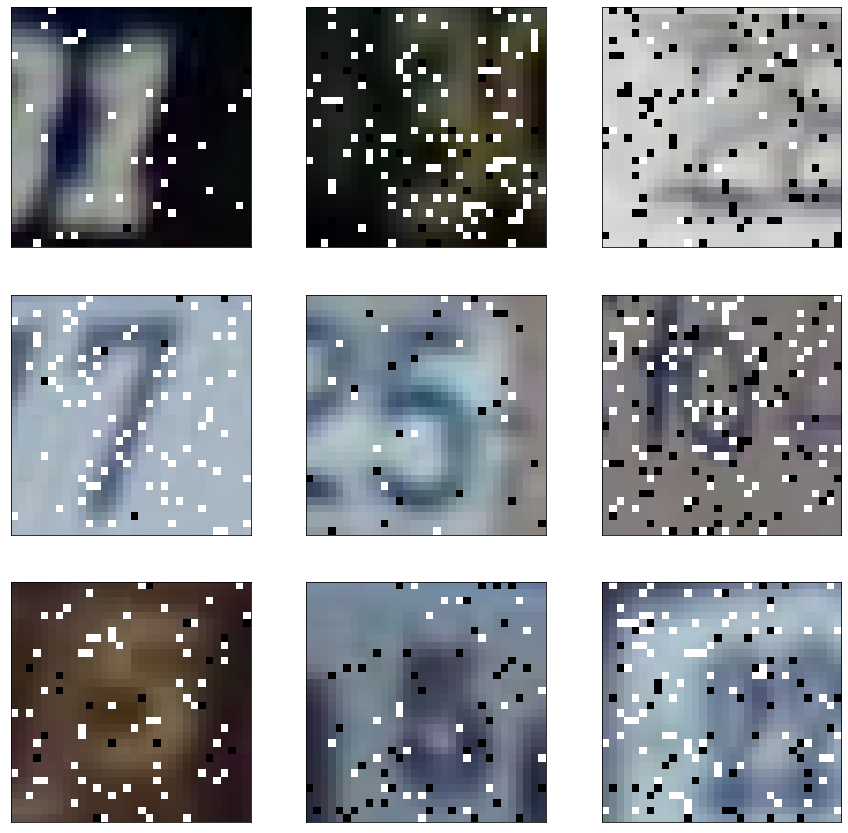

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_full[i], cmap=plt.cm.binary)
plt.show()

*Заметим, что данные имеют подпорченный вид: некоторые пиксели являются битыми. Также можно заметить - будем анализировать цифры.*

##**Researches Part 1**

####**Article:** **AutoAugment: Learning Augmentation Strategies from Data**
**by Google Brains**

*Здесь приводятся некоторые цитаты по SVHN и  augmentation policy исследовательской статьи -*

**AutoAugment: Learning Augmentation Strategies from Data, (AutoAugment, AA), by Google Brain**

*для ознакомления:* https://arxiv.org/pdf/1805.09501.pdf - *2019 CVPR, >600 ссылок;*

**Experimental result:**


> "*After searching the **optimized augmentation policy**, it is applied to train the entire dataset with **higher accuracy** achieved.*"

> *- После поиска оптимизированного типа аугментации он применяется для обучения всего набора данных с достижением более высокой точности.*

**В этой статье о SVHN:**


> "*The policies picked on SVHN are different than the transformations picked on CIFAR-10. For example, the most commonly picked transformations on SVHN are **Invert**, **Equalize**, **ShearX/Y**, and **Rotate**.*"

> *- Типы аугментации, выбранные для SVHN, отличаются от преобразований, выбранных для CIFAR-10. Например, в SVHN чаще всего выбирают аугментации **Invert**, **Equalize**, **ShearX/Y** и **Rotate**.*
---
> "*Intuitively, this makes sense since the specific color of numbers is not as important as the relative color of the number and its background.*"

> *- Интуитивно понятно, это имеет смысл, поскольку конкретный цвет чисел не так важен, как относительный цвет числа и его фона*
---
> "*Furthermore, geometric transformations ShearX/Y are two of the most popular transformations on SVHN. This also can be understood by general properties of images in SVHN: **house numbers are often naturally sheared and skewed in the dataset.**"

> *Кроме того, геометрические преобразования ShearX/Y являются двумя наиболее популярными преобразованиями в SVHN. Это также можно понять по общим свойствам изображений в SVHN: номера домов часто естественным образом срезаны и искажены в наборе данных.*

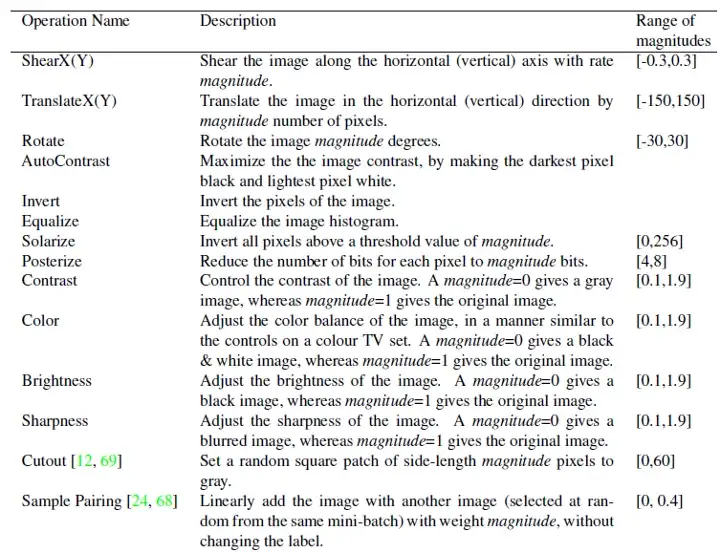

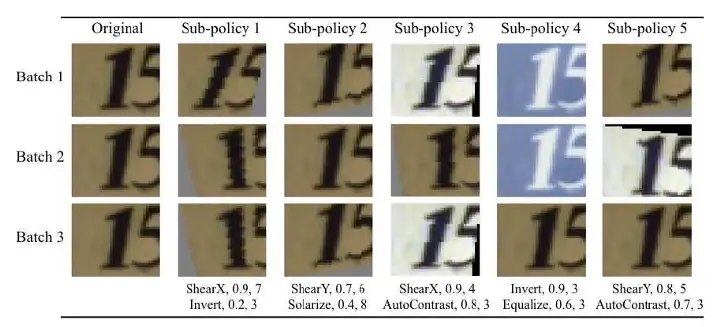

**Выводы по материалам статьи:**

**В данной работе мы будем использовать наиболее оптимизирующие работу нашей модели аугментации и сеты с ними; по эксперементальной работе, проведенной в статье(в частности, с SVHN), мы можем для начала считать, что такие виды аугментации, как Invert, Equalize, ShearX/Y и Rotate являются наиболее оптимальными в SVHN.**

####**Article: Augmetation: Deep Residual Learning for Image Recognition,**

####**Article: Augmetation: USING SIMPLE ARCHITECTURES TO OUTPERFORM DEEPER AND MORE COMPLEX ARCHITECTURES**

**Некоторые сслыки на аугментацию датасетов через реккурентные нейросети - важное примечание в посике AA. Именно этим способом были найдены наилучшие аугментации для многих датасетов, в частности для датасета SVHN.**

https://arxiv.org/pdf/1512.03385.pdf

https://arxiv.org/pdf/1608.06037.pdf

####**Article: Batch Normalization  - Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift**

**Статья о важности применения батчнормализации для датасета перед его заргрузкой в тренироку модели, а также о важности BatcNorm внутри сети и его профите.**

https://arxiv.org/pdf/1502.03167.pdf

####**Researches: Blur**

**В данном разделе происходит поиск блюра, его различных вариаций:**

######**AverageBlur:**

In [ ]:
import imgaug.augmenters as iaa

data_augmentation_AverageBlur = iaa.Sequential ([
    iaa.AverageBlur(k=(2, 5)),
])

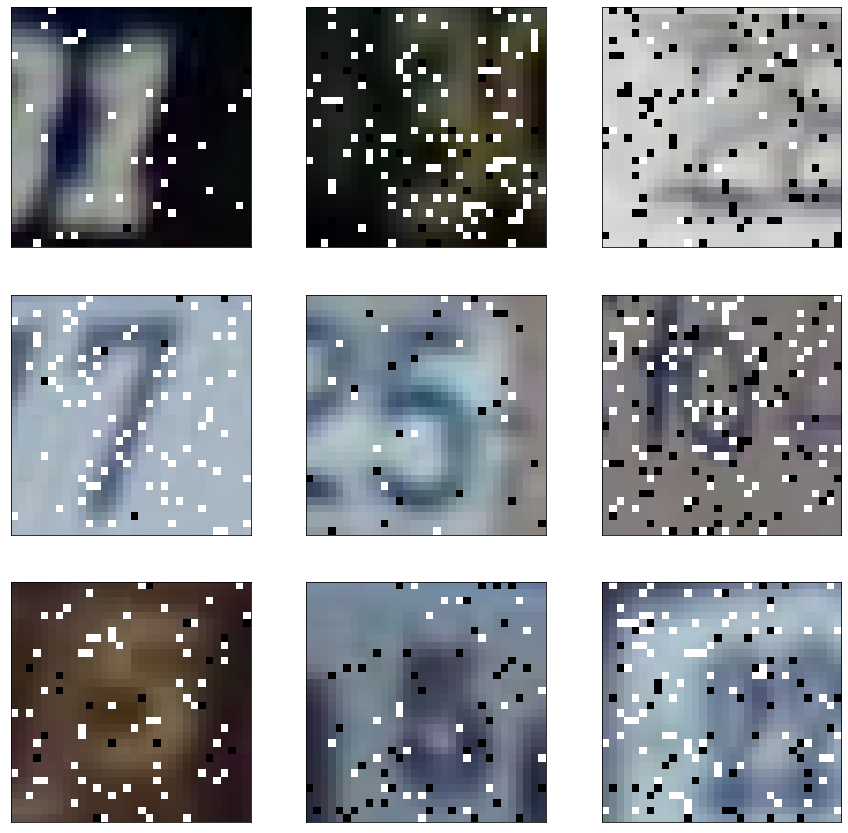

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images_full[i], cmap=plt.cm.binary)
plt.show()

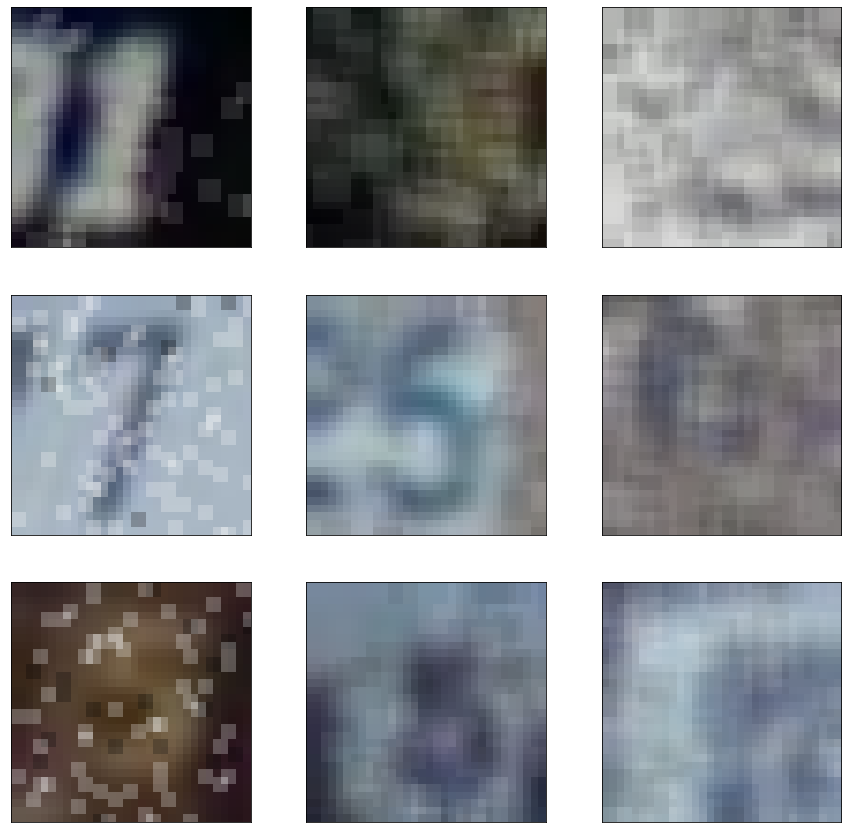

In [ ]:
plt.figure(figsize=(15,15))
augmented_image_average_blur = data_augmentation_AverageBlur(images = train_images_full)
for i in range(9):
  plt.subplot(3,3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(augmented_image_average_blur[i], cmap=plt.cm.binary)
plt.show()

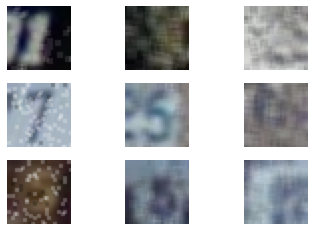

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image_average_blur[i])
  plt.axis("off")

######**GaussianBlur:**

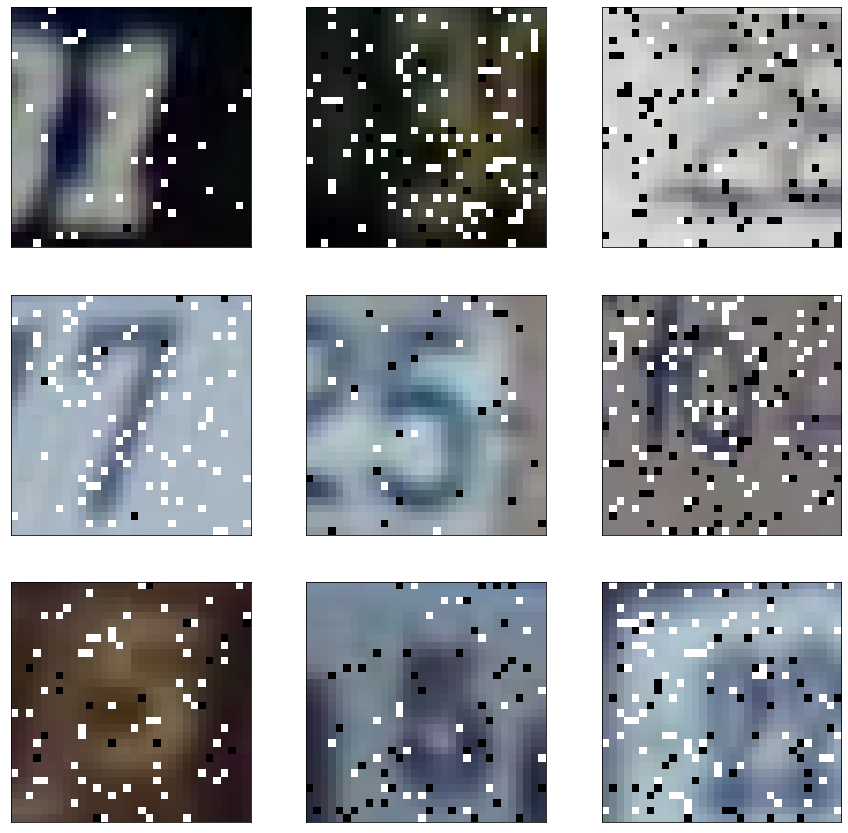

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images_full[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
# import imgaug.augmenters as iaa

data_augmentation_GaussianBlur = iaa.Sequential ([
    iaa.GaussianBlur(sigma=(0.5, 2.0)),
])

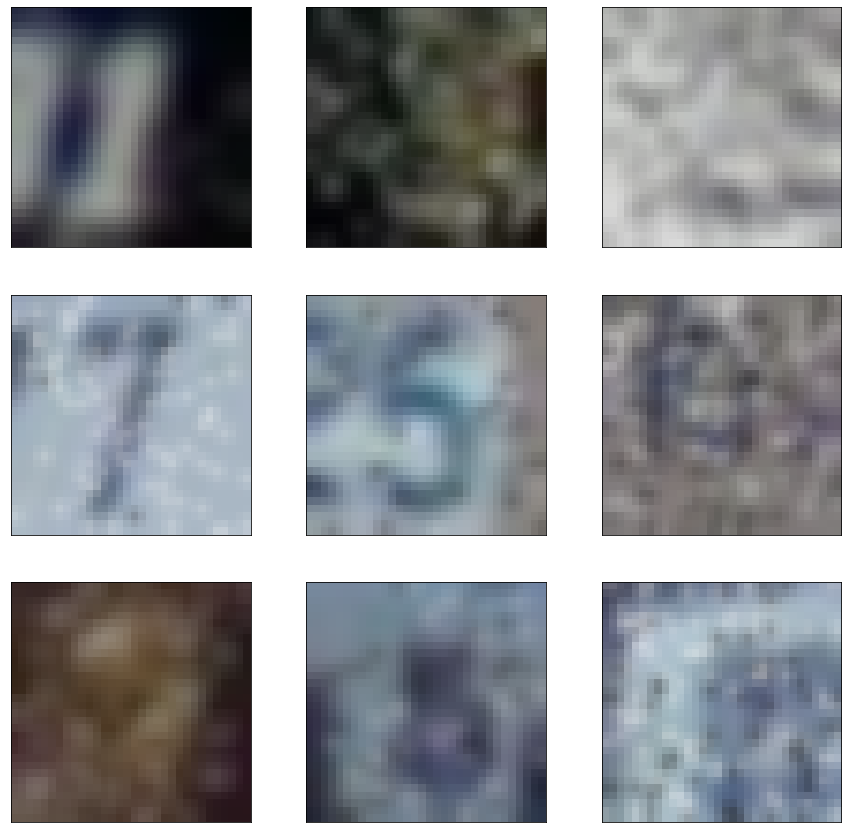

In [ ]:
plt.figure(figsize=(15,15))
augmented_image_gaussian_blur = data_augmentation_GaussianBlur(images = train_images_full)
for i in range(9):
  plt.subplot(3,3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(augmented_image_gaussian_blur[i], cmap=plt.cm.binary)
plt.show()

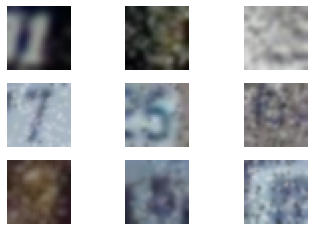

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image_gaussian_blur[i])
  plt.axis("off")

######**MotionBlur:**

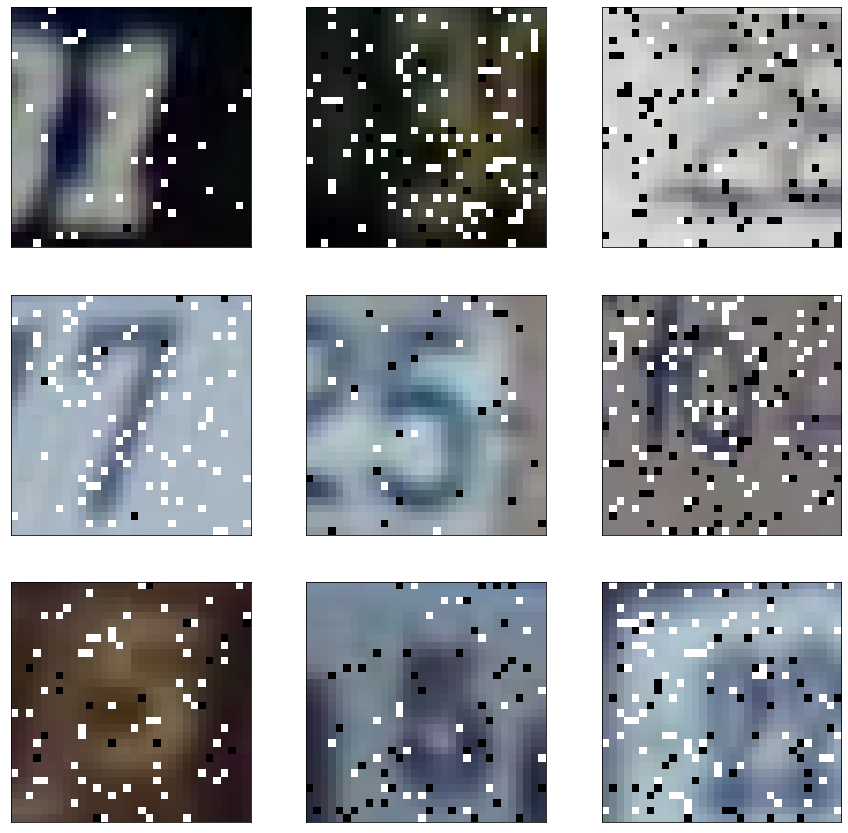

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images_full[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
# import imgaug.augmenters as iaa
data_augmentation_MotionBlur = iaa.Sequential ([
    iaa.MotionBlur(k=5)
])

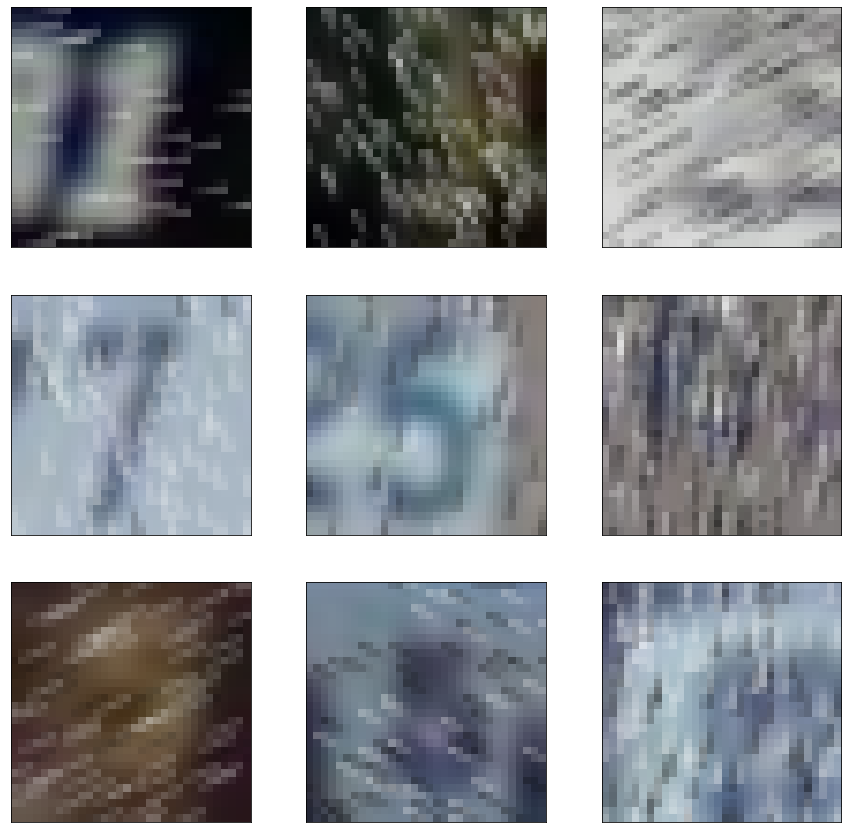

In [ ]:
plt.figure(figsize=(15,15))
augmented_image_motion_blur = data_augmentation_MotionBlur(images = train_images_full)
for i in range(9):
  plt.subplot(3,3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(augmented_image_motion_blur[i], cmap=plt.cm.binary)
plt.show()

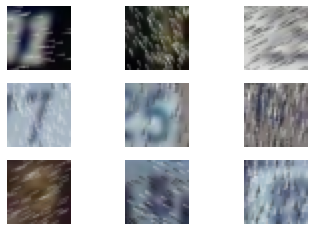

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image_motion_blur[i])
  plt.axis("off")

######**MedianBlur**

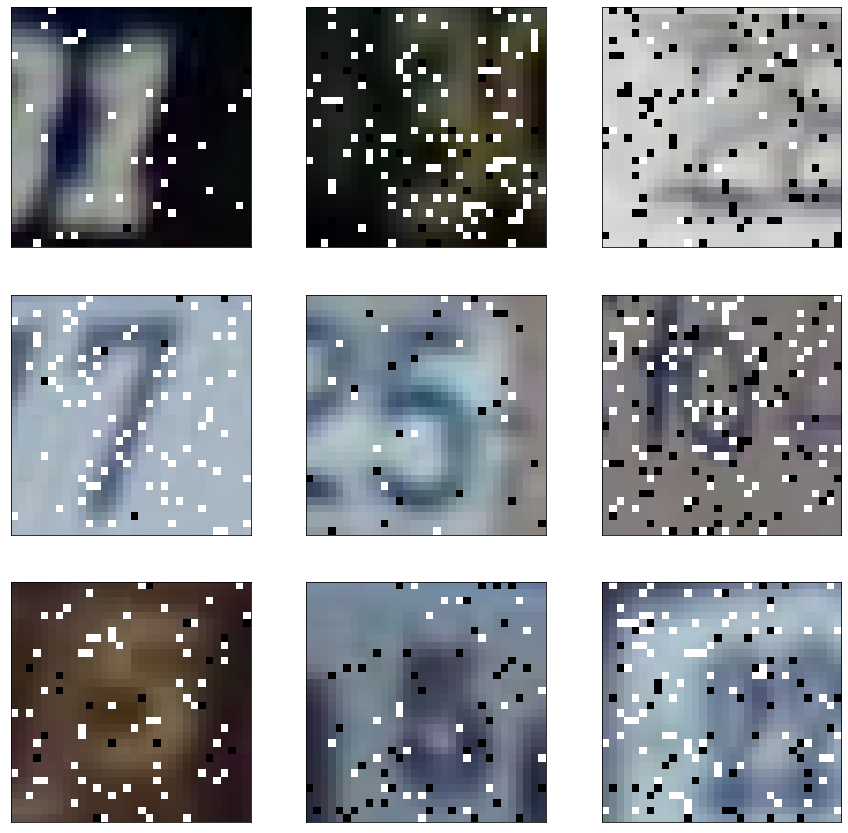

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images_full[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
import imgaug.augmenters as iaa

data_augmentation_MedianBlur = iaa.Sequential ([
    iaa.MedianBlur(k=5)
])

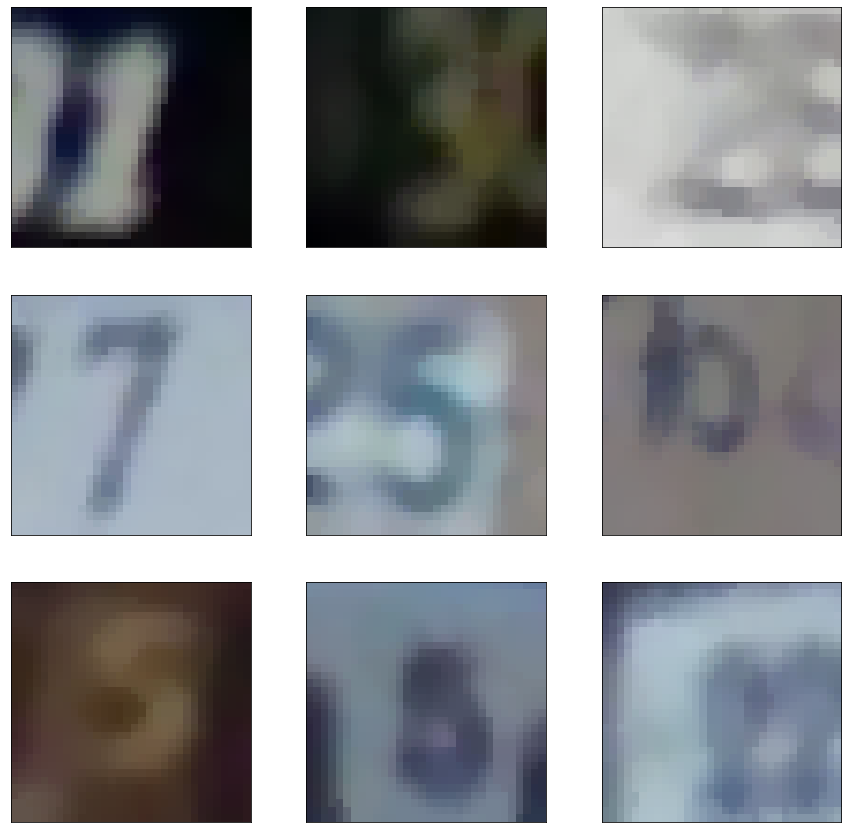

In [ ]:
plt.figure(figsize=(15,15))
augmented_image_median_blur = data_augmentation_MedianBlur(images = train_images_full)
for i in range(9):
  plt.subplot(3,3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(augmented_image_median_blur[i], cmap=plt.cm.binary)
plt.show()

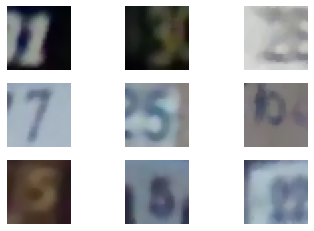

In [ ]:
from matplotlib import pyplot as plt
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image_median_blur[i])
  plt.axis("off")

######**Вывод:**

**original:**

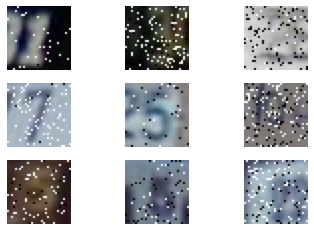

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(train_images_full[i])
  plt.axis("off")

**blur:**

*1 строка* *-* **AverageBlur**

*2 строка* *-* **GaussianBlur**

*3 строка* *-* **MotionBlur**

*4 строка* *-* **MedianBlur**

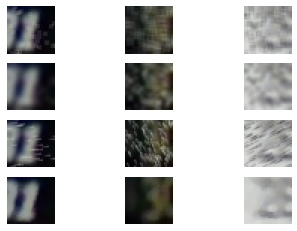

In [ ]:
for i in range(3):
  ax = plt.subplot(4, 3, i + 1)
  plt.imshow(augmented_image_average_blur[i])
  plt.axis("off")

for i in range(3, 6):
  ax = plt.subplot(4, 3, i + 1)
  plt.imshow(augmented_image_gaussian_blur[i - 3])
  plt.axis("off")

for i in range(6, 9):
  ax = plt.subplot(4, 3, i + 1)
  plt.imshow(augmented_image_motion_blur[i - 6])
  plt.axis("off")

for i in range(9, 12):
  ax = plt.subplot(4, 3, i + 1)
  plt.imshow(augmented_image_median_blur[i - 9])
  plt.axis("off")

**Медианный блюр является лучшим среди них - будем использовать его**

####**Researches: Experimental sub-policy from the article 1 about AA**

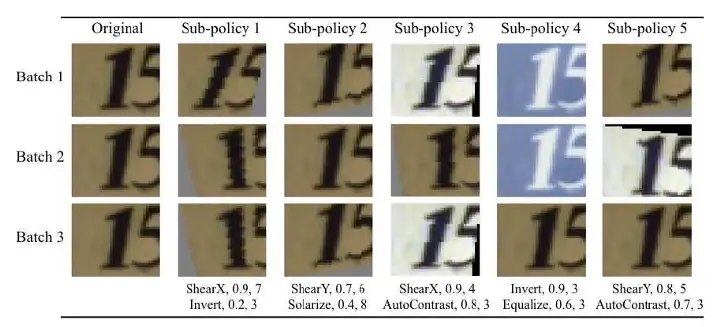

**Виды различных sub-policy, представленных в статье.**

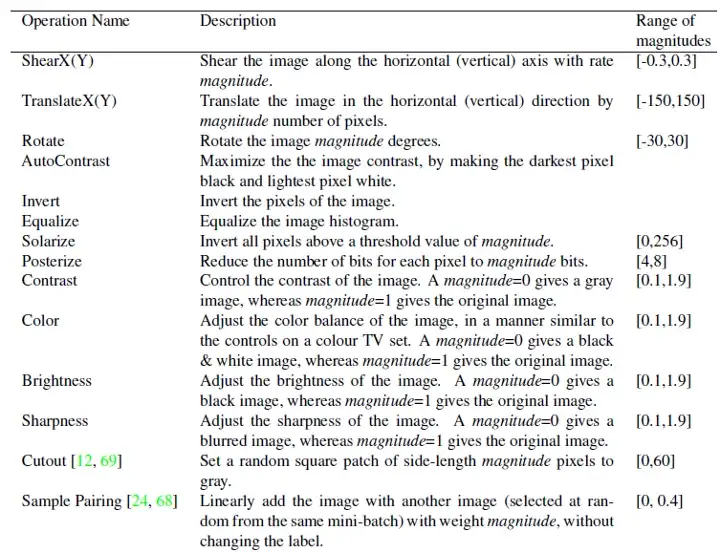

**Наиболее оптимизированным считается(по мнению авторов) для датасета SVHN - sub-policy 4.**

**Реализуем их:**

In [ ]:
# import numpy as np

In [ ]:
# #импортируем данные из Blur
# data1 = augmented_image_average_blur
# data2 = augmented_image_gaussian_blur              # импортируется в след разделе - снимите пояснения по желанию
# data3 = augmented_image_motion_blur

######Исследования из статьи:


######**Sub-policy 1**

In [ ]:
# data_augmentation_one = iaa.Sequential ([
#     iaa.ShearX([-0.3, 0.3]),
#     iaa.Invert(),
# ])
# augmented_images_one1 = data_augmentation_one(images = data1)
# augmented_images_one2 = data_augmentation_one(images = data2)
# augmented_images_one3 = data_augmentation_one(images = data3)


In [ ]:
# for i in range(9):
#   ax = plt.subplot(3, 3, i + 1)
#   plt.imshow((augmented_images_one1[i] * 255).astype(np.uint8))
#   plt.axis("off")

In [ ]:
# for i in range(9):
#   ax = plt.subplot(3, 3, i + 1)
#   plt.imshow((augmented_images_one2[i] * 255).astype(np.uint8))
#   plt.axis("off")

In [ ]:
# for i in range(9):
#   ax = plt.subplot(3, 3, i + 1)
#   plt.imshow((augmented_images_one3[i] * 255).astype(np.uint8))
#   plt.axis("off")

######**Sub-policy 4**

In [ ]:
# data_augmentation_four = iaa.Sequential ([
#     iaa.Invert(),
#     iaa.pillike.Equalize()
# ])

# augmented_images_four1 = data_augmentation_four(images = (data1 * 255).astype(np.uint8))
# augmented_images_four2 = data_augmentation_four(images = (data2 * 255).astype(np.uint8))
# augmented_images_four3 = data_augmentation_four(images = (data3 * 255).astype(np.uint8))


In [ ]:
# for i in range(9):
#   ax = plt.subplot(3, 3, i + 1)
#   plt.imshow(augmented_images_four1[i])
#   plt.axis("off")

In [ ]:
# for i in range(9):
#   ax = plt.subplot(3, 3, i + 1)
#   plt.imshow(augmented_images_four2[i])
#   plt.axis("off")

In [ ]:
# for i in range(9):
#   ax = plt.subplot(3, 3, i + 1)
#   plt.imshow(augmented_images_four3[i])
#   plt.axis("off")

######**Sub-policy 2**

In [ ]:
# data_augmentation_two = iaa.Sequential ([
#     iaa.ShearY(),
#     iaa.Solarize(0.256)
# ])

# augmented_images_two1 = data_augmentation_two(images = data1)
# augmented_images_two2 = data_augmentation_two(images = data2)
# augmented_images_two3 = data_augmentation_two(images = data3)


In [ ]:
# for i in range(9):
#   ax = plt.subplot(3, 3, i + 1)
#   plt.imshow((augmented_images_two1[i] * 255).astype(np.uint8))
#   plt.axis("off")

In [ ]:
# for i in range(9):
#   ax = plt.subplot(3, 3, i + 1)
#   plt.imshow((augmented_images_two2[i] * 255).astype(np.uint8))
#   plt.axis("off")

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((augmented_images_two3[i] * 255).astype(np.uint8))
  plt.axis("off")

######**Sub-policy 3**

In [ ]:
data_augmentation_three = iaa.Sequential ([
    iaa.ShearX((-0.3, 0.3)),
    iaa.pillike.Autocontrast()
])

augmented_images_three1 = data_augmentation_three(images = (data1 * 255).astype(np.uint8))
augmented_images_three2 = data_augmentation_three(images = (data2 * 255).astype(np.uint8))
augmented_images_three3 = data_augmentation_three(images = (data3 * 255).astype(np.uint8))


In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_images_three1[i])
  plt.axis("off")

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_images_three2[i])
  plt.axis("off")

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_images_three3[i])
  plt.axis("off")

######**Sub-policy 5**

In [ ]:
data_augmentation_five = iaa.Sequential ([
    iaa.ShearY(),
    iaa.pillike.Autocontrast()
])

augmented_images_five1 = data_augmentation_five(images = (data1 * 255).astype(np.uint8))
augmented_images_five2 = data_augmentation_five(images = (data2 * 255).astype(np.uint8))
augmented_images_five3 = data_augmentation_five(images = (data3 * 255).astype(np.uint8))


In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_images_five1[i])
  plt.axis("off")

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_images_five2[i])
  plt.axis("off")

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_images_five3[i])
  plt.axis("off")

augmented_images_five1
augmented_images_five2
augmented_images_five3

augmented_images_four1
augmented_images_four2
augmented_images_four3

augmented_images_three1
augmented_images_three2
augmented_images_three3

augmented_images_two1
augmented_images_two2
augmented_images_two3

augmented_images_one1
augmented_images_one2
augmented_images_one3

#####**- Experimental sub-policy augmentation - own**

*Возьмем некоторые **сочетания видов аугментации из статьи**, так как, по мнению авторов, они являются оптимальными в нормализации нашего датасета:*
- **sub-policy 1**
- **sub-policy 4**

Также добавим некоторые свои аугментации по рекомендациям из статьи - будем работать с рекомендованными: **Invert, Rotate, ShearX/Y, Equalize - sub-policy 2.n**

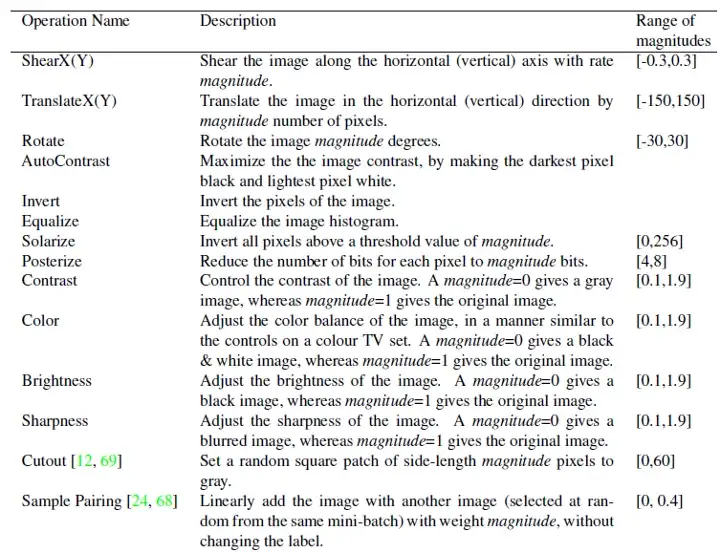

In [ ]:
import numpy as np

# импортируем данные из Blur
data1 = augmented_image_average_blur
data2 = augmented_image_gaussian_blur              # ипортируется в пред разделе
data3 = augmented_image_motion_blur

**SubPolicy augmentation:**

######**Sub-policy 1**

In [ ]:
data_augmentation_one = iaa.Sequential ([
    iaa.ShearX([-0.3, 0.3]),
    iaa.Invert(),
])
augmented_images_one1 = data_augmentation_one(images = data1)
augmented_images_one2 = data_augmentation_one(images = data2)
augmented_images_one3 = data_augmentation_one(images = data3)


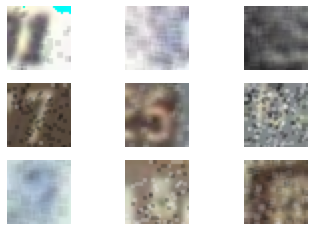

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((augmented_images_one1[i] * 255).astype(np.uint8))
  plt.axis("off")

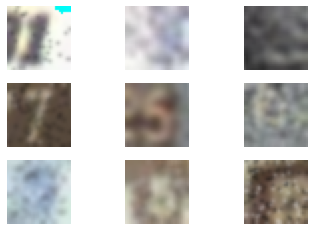

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((augmented_images_one2[i] * 255).astype(np.uint8))
  plt.axis("off")

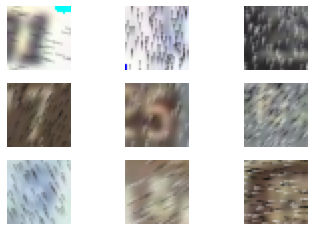

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((augmented_images_one3[i] * 255).astype(np.uint8))
  plt.axis("off")

######**Sub-policy 4**

In [ ]:
data_augmentation_four = iaa.Sequential ([
    iaa.Invert(),
    iaa.pillike.Equalize()
])

augmented_images_four1 = data_augmentation_four(images = (data1 * 255).astype(np.uint8))
augmented_images_four2 = data_augmentation_four(images = (data2 * 255).astype(np.uint8))
augmented_images_four3 = data_augmentation_four(images = (data3 * 255).astype(np.uint8))


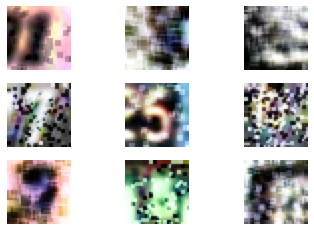

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_images_four1[i])
  plt.axis("off")

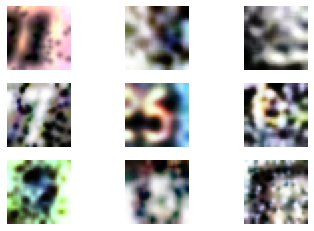

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_images_four2[i])
  plt.axis("off")

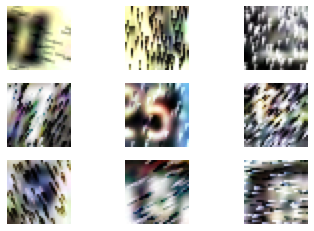

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_images_four3[i])
  plt.axis("off")

######**Sub-policy 2.1**

In [ ]:
data_augmentation_twone = iaa.Sequential ([
    iaa.Rotate([-8, 8]),
    iaa.ShearX([-0.3, 0.3]),
    iaa.Invert(),
])
augmented_images_twone1 = data_augmentation_twone(images = data1)
augmented_images_twone2 = data_augmentation_twone(images = data2)
augmented_images_twone3 = data_augmentation_twone(images = data3)


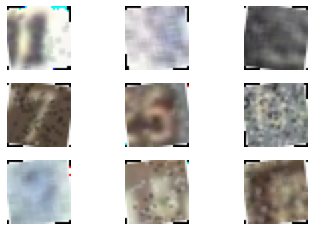

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((augmented_images_twone1[i] * 255).astype(np.uint8))
  plt.axis("off")

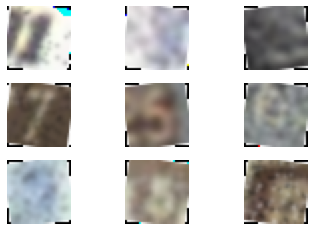

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((augmented_images_twone2[i] * 255).astype(np.uint8))
  plt.axis("off")

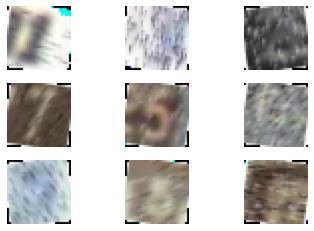

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((augmented_images_twone3[i] * 255).astype(np.uint8))
  plt.axis("off")

In [ ]:
data_augmentation_twotwo = iaa.Sequential ([
    iaa.Rotate([-30, 30]),
    iaa.Invert(),
])
augmented_images_twotwo1 = data_augmentation_twotwo(images = data1)
augmented_images_twotwo2 = data_augmentation_twotwo(images = data2)
augmented_images_twotwo3 = data_augmentation_twotwo(images = data3)


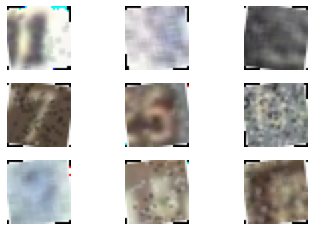

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((augmented_images_twone1[i] * 255).astype(np.uint8))
  plt.axis("off")

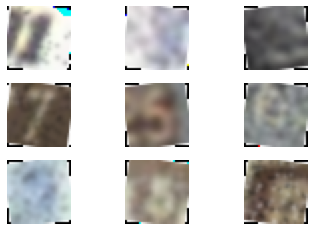

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((augmented_images_twone2[i] * 255).astype(np.uint8))
  plt.axis("off")

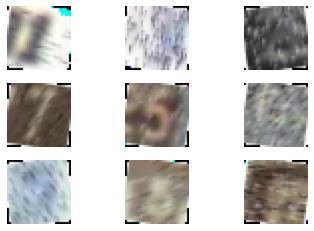

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((augmented_images_twone3[i] * 255).astype(np.uint8))
  plt.axis("off")

######**Sub-policy 2.2**

In [ ]:
data_augmentation_twothree = iaa.Sequential ([
    iaa.ShearX([-0.5, 0.5]),
    iaa.Invert(),
])
augmented_images_twothree1 = data_augmentation_twothree(images = data1)
augmented_images_twothree2 = data_augmentation_twothree(images = data2)
augmented_images_twothree3 = data_augmentation_twothree(images = data3)


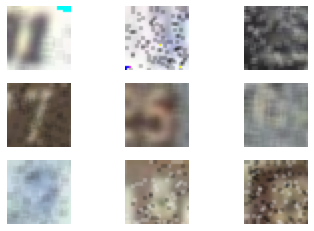

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((augmented_images_twothree1[i] * 255).astype(np.uint8))
  plt.axis("off")

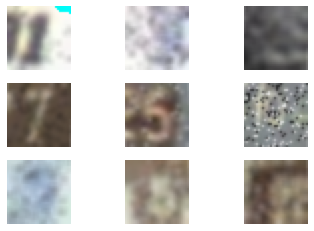

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((augmented_images_twothree2[i] * 255).astype(np.uint8))
  plt.axis("off")

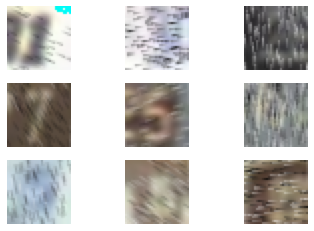

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((augmented_images_twothree3[i] * 255).astype(np.uint8))
  plt.axis("off")

######**Sub-policy 2.3**

In [ ]:
data_augmentation_twofour = iaa.Sequential ([
    iaa.ShearX([10, -10]),
    iaa.Invert(),
])
augmented_images_twofour1 = data_augmentation_twofour(images = data1)
augmented_images_twofour2 = data_augmentation_twofour(images = data2)
augmented_images_twofour3 = data_augmentation_twofour(images = data3)


In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((augmented_images_twofour1[i] * 255).astype(np.uint8))
  plt.axis("off")

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((augmented_images_twofour2[i] * 255).astype(np.uint8))
  plt.axis("off")

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((augmented_images_twofour3[i] * 255).astype(np.uint8))
  plt.axis("off")

In [ ]:
data_augmentation_twofive = iaa.Sequential ([
    iaa.ShearX([-0.3, 0.3]),
    iaa.Invert(),
])
augmented_images_twofive1 = data_augmentation_twofive(images = data1)
augmented_images_twofive2 = data_augmentation_twofive(images = data2)
augmented_images_twofive3 = data_augmentation_twofive(images = data3)


In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((augmented_images_twofive1[i] * 255).astype(np.uint8))
  plt.axis("off")

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((augmented_images_twone2[i] * 255).astype(np.uint8))
  plt.axis("off")

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((augmented_images_twone3[i] * 255).astype(np.uint8))
  plt.axis("off")

In [ ]:
# импортируем данные из Preprocessing for model(Batch Normalization only for sub-policy augmentation)

# train_images
# train_labels

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

####**Researches: DataGen**

**Датагенератор - одна из самых полезных вещей в области аугментаций. Он позволяет генерировать новые данные(простые аугментации - геометрические, zoom) - прямо во время работы модели. Это приводит к меньшим затратам процессора, и, как следствие, к профиту.**

####**Annotation: About research the model**

**Модель в решении задачи не сильно играет роль. Тот же WideResNet 28-10 выдает метрики чуть лучше, чем тот же ResNet. На самом деле максимальный профит возможен при вариации больших количеств данных. Увы, в наших возмлностях это не представлено. Но, важно понимать, что s-c выигрывает у своих младших собратьев ConvNet ввиду корректировки проблемы затухания градиента, повышает точность, путем добавления более простых результатов из первых слоев сети к последним. Результат получается более взвешенным.**

##**A note about the search**

**В разделе Researches Part 1 мы занимались исследованиями, в частности - мы посмотрели различные виды блюра, аугментаций. В части подготовки данных - Preprocessing Data мы вывделили наилучшии обработки данных и используем их.**

**Говоря об обработке в части Preprocessing Data, мы не будем цитировать статьи. Все это описанов разделе Researches Part 1. Надеемся на понимание.**

**О наилучших обработках:**

**- Блюр - Медианный;**

**- Аугментации - AA for SVHN data, dataGen(абстрагированный под SVHN);**

**- Модели - ConvNet, ConvNet s-c, ResNet BN, WideResNet;**

##**Preprocessing Data**

####**Annotation: about Data**

**train_images_full, train_labels_full,
test_images - rescaled data: дополнительное приведение в вид /255.0 не требуется** *(приведение в вид - **Import**);*




####**Split data on val and train, initialize a test image**

**Разделение полного train-data(данный на kaggle) на train и val - тренировочный и валидационный датасеты - на них мы будем оценивать работу наших моделей.**

In [ ]:
# train_images_full, train_labels_full
# to val and train sets

In [ ]:
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images_full, train_labels_full, test_size=0.01)

In [ ]:
# test_images
# from Import data

####**Augmentation: Blur**


**Примечание** *: одновременный запуск двух ячеек не рекомендуется - изменение датасета происходит на этапе аугментаций. Это может повлечь за собой такие последствия, как изменение блюром выборки, которая должна являться неаугментированной.*

**Приведено создание двух датасетов - с блюром и без. Здесь приводится аугментация блюра - одна из наиболее наилучших - медианный блюр.**

######**aug_full:**

**Val:**

In [ ]:
for i in range(len(validation_images)):
  validation_images[i] = cv2.medianBlur(validation_images[i], 3)

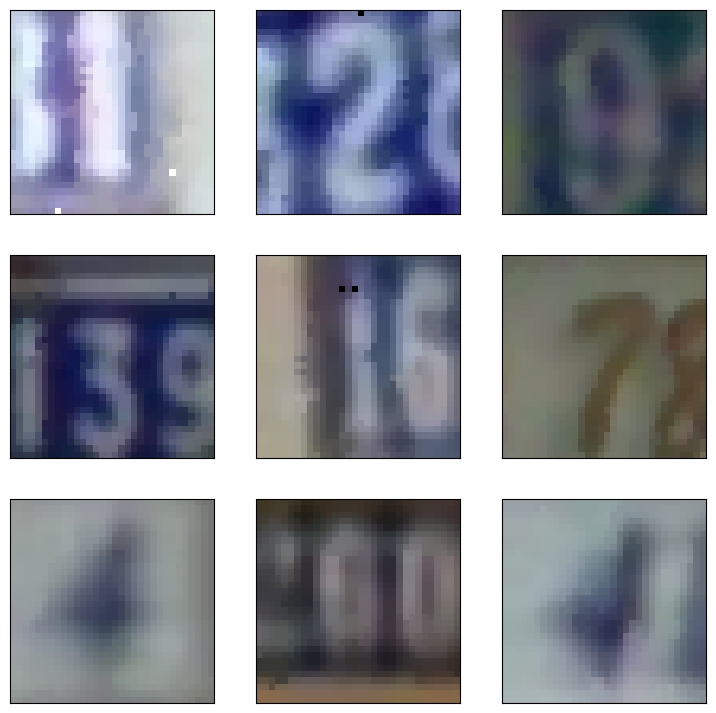

In [ ]:
plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(validation_images[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
X_val1 = validation_images
y_val1 = validation_labels

---

**Train:**

In [ ]:
for i in range(len(train_images)):
 train_images[i] = cv2.medianBlur(train_images[i], 3)

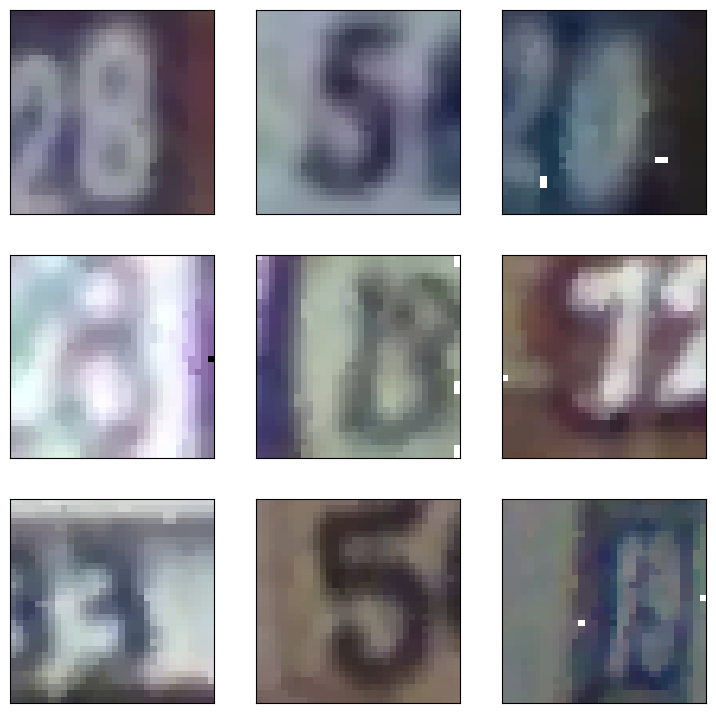

In [ ]:
plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
X_train1 = train_images
y_train1 = train_labels

---

**Test:**

In [ ]:
for i in range(len(test_images)):
  test_images[i] = cv2.medianBlur(test_images[i], 3)

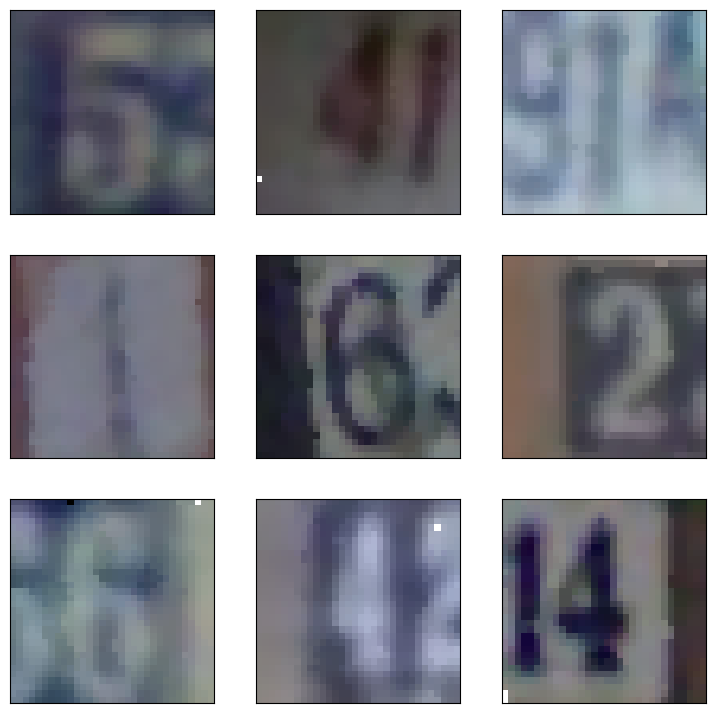

In [ ]:
plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
X_test1 = test_images

######**not_aug_full:**

**Val:**

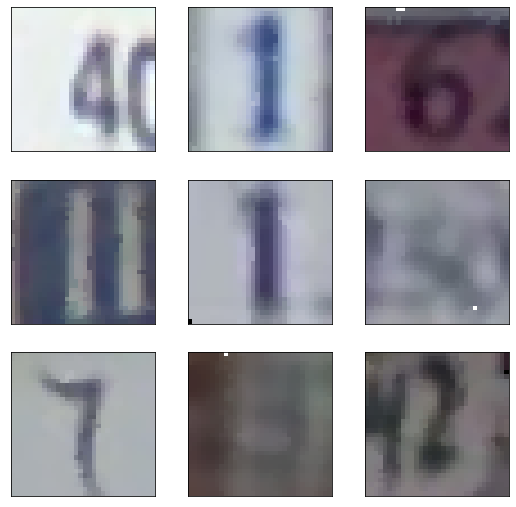

In [ ]:
plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(validation_images[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
X_val2 = validation_images
y_val2 = validation_labels

---

**Train:**

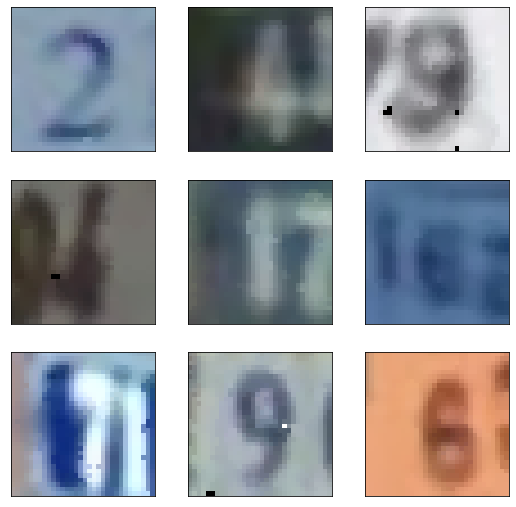

In [ ]:
plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
X_train2 = train_images
y_train2 = train_labels

---

**Test:**

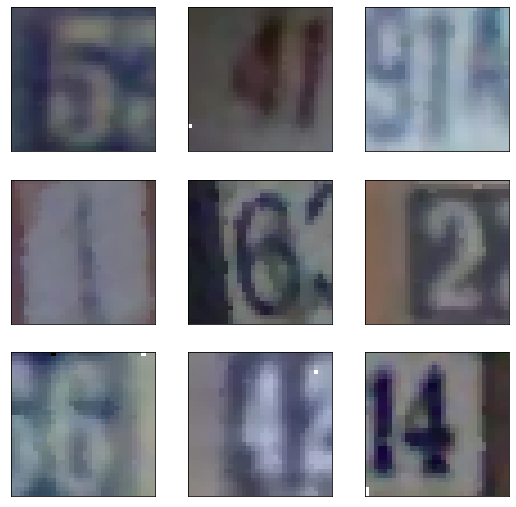

In [ ]:
plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
X_test2 = test_images


####**Augmentation: AA Sub-policy - **pytorch****

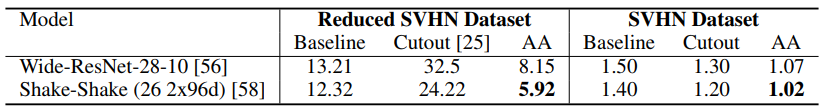

**Ссылаясь на статью об исследованиях в области autoaugmentation(root: Researches Part 1/Article: AutoAugment: Learning Augmentation Strategies from Data by Google Brains), наших тестах аугментаций - наилучших политик из исследований.*

**Написан подбор политик по определенным вероятностям - суть AA - применен к аугментированным данным.**

#####**Initializing policy**

**Обозначение подполитики аугментации для SVHN. Написание аугментаций для изображений:**

In [ ]:
# import torch
# from torchvision.datasets import ImageFolder
# from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms

In [ ]:
from PIL import Image, ImageEnhance, ImageOps
import random
import torch


class ShearX(object):
    def __init__(self, fillcolor=(128, 128, 128)):
        self.fillcolor = fillcolor

    def __call__(self, x, magnitude):
        return x.transform(
            x.size, Image.AFFINE, (1, magnitude * random.choice([-1, 1]), 0, 0, 1, 0),
            Image.BICUBIC, fillcolor=self.fillcolor)


class ShearY(object):
    def __init__(self, fillcolor=(128, 128, 128)):
        self.fillcolor = fillcolor

    def __call__(self, x, magnitude):
        return x.transform(
            x.size, Image.AFFINE, (1, 0, 0, magnitude * random.choice([-1, 1]), 1, 0),
            Image.BICUBIC, fillcolor=self.fillcolor)


class TranslateX(object):
    def __init__(self, fillcolor=(128, 128, 128)):
        self.fillcolor = fillcolor

    def __call__(self, x, magnitude):
        return x.transform(
            x.size, Image.AFFINE, (1, 0, magnitude * x.size[0] * random.choice([-1, 1]), 0, 1, 0),
            fillcolor=self.fillcolor)


class TranslateY(object):
    def __init__(self, fillcolor=(128, 128, 128)):
        self.fillcolor = fillcolor

    def __call__(self, x, magnitude):
        return x.transform(
            x.size, Image.AFFINE, (1, 0, 0, 0, 1, magnitude * x.size[1] * random.choice([-1, 1])),
            fillcolor=self.fillcolor)


class Rotate(object):
    def __call__(self, x, magnitude):
        rot = x.convert("RGBA").rotate(magnitude * random.choice([-1, 1]))
        return Image.composite(rot, Image.new("RGBA", rot.size, (128,) * 4), rot).convert(x.mode)


class Color(object):
    def __call__(self, x, magnitude):
        return ImageEnhance.Color(x).enhance(1 + magnitude * random.choice([-1, 1]))


class Posterize(object):
    def __call__(self, x, magnitude):
        return ImageOps.posterize(x, magnitude)


class Solarize(object):
    def __call__(self, x, magnitude):
        return ImageOps.solarize(x, magnitude)


class Contrast(object):
    def __call__(self, x, magnitude):
        return ImageEnhance.Contrast(x).enhance(1 + magnitude * random.choice([-1, 1]))


class Sharpness(object):
    def __call__(self, x, magnitude):
        return ImageEnhance.Sharpness(x).enhance(1 + magnitude * random.choice([-1, 1]))


class Brightness(object):
    def __call__(self, x, magnitude):
        return ImageEnhance.Brightness(x).enhance(1 + magnitude * random.choice([-1, 1]))


class AutoContrast(object):
    def __call__(self, x, magnitude):
        return ImageOps.autocontrast(x)


class Equalize(object):
    def __call__(self, x, magnitude):
        return ImageOps.equalize(x)


class Invert(object):
    def __call__(self, x, magnitude):
        return ImageOps.invert(x)

In [ ]:
# [('ShearX', 0.9, 4), ('Invert', 0.2, 3)],
# [('ShearY', 0.9, 8), ('Invert', 0.7, 5)],
# [('Equalize', 0.6, 5), ('Solarize', 0.6, 6)],
# [('Invert', 0.9, 3), ('Equalize', 0.6, 3)],
# [('Equalize', 0.6, 1), ('Rotate', 0.9, 3)],
# [('ShearX', 0.9, 4), ('AutoContrast', 0.8, 3)],
# [('ShearY', 0.9, 8), ('Invert', 0.4, 5)],
# [('ShearY', 0.9, 5), ('Solarize', 0.2, 6)],
# [('Invert', 0.9, 6), ('AutoContrast', 0.8, 1)],
# [('Equalize', 0.6, 3), ('Rotate', 0.9, 3)],
# [('ShearX', 0.9, 4), ('Solarize', 0.3, 3)],
# [('ShearY', 0.8, 8), ('Invert', 0.7, 4)],
# [('Equalize', 0.9, 5), ('TranslateY', 0.6, 6)],
# [('Invert', 0.9, 4), ('Equalize', 0.6, 7)],
# [('Contrast', 0.3, 3), ('Rotate', 0.8, 4)],
# [('Invert', 0.8, 5), ('TranslateY', 0.0, 2)],
# [('ShearY', 0.7, 6), ('Solarize', 0.4, 8)],
# [('Invert', 0.6, 4), ('Rotate', 0.8, 4)],
# [('ShearY', 0.3, 7), ('TranslateX', 0.9, 3)],
# [('ShearX', 0.1, 6), ('Invert', 0.6, 5)],
# [('Solarize', 0.7, 2), ('TranslateY', 0.6, 7)],
# [('ShearY', 0.8, 4), ('Invert', 0.8, 8)],
# [('ShearX', 0.7, 9), ('TranslateY', 0.8, 3)],
# [('ShearY', 0.8, 5), ('AutoContrast', 0.7, 3)],
# [('ShearX', 0.7, 2), ('Invert', 0.1, 5)]

In [ ]:
class SVHNPolicy(object):
    def __init__(self, fillcolor=(128, 128, 128)):
        self.policies = [
            SubPolicy(0.9, "shearX", 4, 0.2, "invert", 3, fillcolor),
            SubPolicy(0.9, "shearY", 8, 0.7, "invert", 5, fillcolor),
            SubPolicy(0.6, "equalize", 5, 0.6, "solarize", 6, fillcolor),
            SubPolicy(0.9, "invert", 3, 0.6, "equalize", 3, fillcolor),

            SubPolicy(0.9, "shearX", 4, 0.8, "autocontrast", 3, fillcolor),
            SubPolicy(0.9, "shearY", 8, 0.4, "invert", 5, fillcolor),
            SubPolicy(0.9, "shearY", 5, 0.2, "solarize", 6, fillcolor),
            SubPolicy(0.9, "invert", 6, 0.8, "autocontrast", 1, fillcolor),

            SubPolicy(0.9, "shearX", 4, 0.3, "solarize", 3, fillcolor),
            SubPolicy(0.8, "shearY", 8, 0.7, "invert", 4, fillcolor),
            SubPolicy(0.9, "equalize", 5, 0.6, "translateY", 6, fillcolor),
            SubPolicy(0.9, "invert", 4, 0.6, "equalize", 7, fillcolor),

            SubPolicy(0.8, "invert", 5, 0.0, "translateY", 2, fillcolor),
            SubPolicy(0.7, "shearY", 6, 0.4, "solarize", 8, fillcolor),
            SubPolicy(0.3, "shearY", 7, 0.9, "translateX", 3, fillcolor),
            SubPolicy(0.1, "shearX", 6, 0.6, "invert", 5, fillcolor),

            SubPolicy(0.7, "solarize", 2, 0.6, "translateY", 7, fillcolor),
            SubPolicy(0.8, "shearY", 4, 0.8, "invert", 8, fillcolor),
            SubPolicy(0.7, "shearX", 9, 0.8, "translateY", 3, fillcolor),
            SubPolicy(0.8, "shearY", 5, 0.7, "autocontrast", 3, fillcolor),
            SubPolicy(0.7, "shearX", 2, 0.1, "invert", 5, fillcolor)
        ]

    def __call__(self, img):
        policy_idx = random.randint(0, len(self.policies) - 1)
        return self.policies[policy_idx](img)

    def __repr__(self):
        return "AutoAugment SVHN Policy"


class SubPolicy(object):
    def __init__(self, p1, operation1, magnitude_idx1, p2, operation2, magnitude_idx2, fillcolor=(128, 128, 128)):
        ranges = {
            "shearX": np.linspace(0, 0.15 , 10),
            "shearY": np.linspace(0, 0.15, 10),
            "translateX": np.linspace(0, 75 / 331, 10),
            "translateY": np.linspace(0, 75 / 331, 10),
            "rotate": np.linspace(0, 30, 10),
            "color": np.linspace(0.0, 0.9, 10),
            "posterize": np.round(np.linspace(8, 4, 10), 0).astype(np.int),
            "solarize": np.linspace(256, 0, 10),
            "contrast": np.linspace(0.0, 0.9, 10),
            "sharpness": np.linspace(0.0, 0.9, 10),
            "brightness": np.linspace(0.0, 0.9, 10),
            "autocontrast": [0] * 10,
            "equalize": [0] * 10,
            "invert": [0] * 10
        }

        func = {
            "shearX": ShearX(fillcolor=fillcolor),
            "shearY": ShearY(fillcolor=fillcolor),
            "translateX": TranslateX(fillcolor=fillcolor),
            "translateY": TranslateY(fillcolor=fillcolor),
            "rotate": Rotate(),
            "color": Color(),
            "posterize": Posterize(),
            "solarize": Solarize(),
            "contrast": Contrast(),
            "sharpness": Sharpness(),
            "brightness": Brightness(),
            "autocontrast": AutoContrast(),
            "equalize": Equalize(),
            "invert": Invert()
        }

        self.p1 = p1
        self.operation1 = func[operation1]
        self.magnitude1 = ranges[operation1][magnitude_idx1]
        self.p2 = p2
        self.operation2 = func[operation2]
        self.magnitude2 = ranges[operation2][magnitude_idx2]

    def __call__(self, img):
        if random.random() < self.p1:
            img = self.operation1(img, self.magnitude1)
        if random.random() < self.p2:
            img = self.operation2(img, self.magnitude2)
        return img

In [ ]:
class Cutout(object):
    """Randomly mask out one or more patches from an image.
    Args:
        n_holes (int): Number of patches to cut out of each image.
        length (int): The length (in pixels) of each square patch.
    """
    def __init__(self, n_holes, length):
        self.n_holes = n_holes
        self.length = length

    def __call__(self, img):
        """
        Args:
            img (Tensor): Tensor image of size (C, H, W).
        Returns:
            Tensor: Image with n_holes of dimension length x length cut out of it.
        """
        h = img.size(1)
        w = img.size(2)

        mask = np.ones((h, w), np.float32)

        for n in range(self.n_holes):
            y = np.random.randint(h)
            x = np.random.randint(w)

            y1 = np.clip(y - self.length // 2, 0, h)
            y2 = np.clip(y + self.length // 2, 0, h)
            x1 = np.clip(x - self.length // 2, 0, w)
            x2 = np.clip(x + self.length // 2, 0, w)

            mask[y1: y2, x1: x2] = 0.

        mask = torch.from_numpy(mask)
        mask = mask.expand_as(img)
        img = img * mask

        return img

#####**Run policy**

In [ ]:
X_train01= []
for j in range(len(X_train1)):
  X_train01.append(Image.fromarray((X_train1[j] * 255.0).astype('uint8'), 'RGB'))

In [ ]:
X_val01= []
for j in range(len(X_val1)):
  X_val01.append(Image.fromarray((X_val1[j] * 255.0).astype('uint8'), 'RGB'))

In [ ]:
X_test01= []
for j in range(len(X_test1)):
  X_test01.append(Image.fromarray((X_test1[j] * 255.0).astype('uint8'), 'RGB'))

---

In [ ]:
img_transform = transforms.Compose([
    SVHNPolicy(),
    transforms.PILToTensor(),
    # Cutout(n_holes=1, length=10)
    ])

img = transforms.Compose([
    transforms.PILToTensor()
    ])

<ipython-input-33-17b57a314a89>:48: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  "posterize": np.round(np.linspace(8, 4, 10), 0).astype(np.int),


---

In [ ]:
X_val01 = list(X_val01)
y_val1 = list(y_val1)

# for i in range(len(X_val01)):
#   X_val01.append(X_val01[i])
#   y_val1.append(y_val1[i])

y_val1 = np.array(y_val1)

In [ ]:
X_train01 = list(X_train01)
y_train1 = list(y_train1)
for i in range(len(X_train01)):
  X_train01.append(X_train01[i])
  y_train1.append(y_train1[i])
  X_train01.append(X_train01[i])
  y_train1.append(y_train1[i])


y_train1 = np.array(y_train1)

In [ ]:
# test - nothing

######**val aug:**

In [ ]:
valAns = []

In [ ]:
for i in range(len(X_val01)):
 valAns.append(img_transform(X_val01[i]))

In [ ]:
# X_val01[0]

In [ ]:
# X_val02 = []
# for k in range(len(valAns)):
#   X_val02.append(np.transpose(valAns[k], (1, 2, 0)))

TypeError: ignored

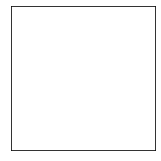

In [ ]:
plt.figure(figsize=(9,9))
k=0
for i in range(5, 14):
    k+=1
    plt.subplot(3,3,k)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(valAns[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
plt.figure(figsize=(9,9))
plt.subplot(1, 1, 1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(valAns[31], cmap=plt.cm.binary)
plt.show()

In [ ]:
X_val02 = np.array(valAns)

######**train aug:**

In [ ]:
trainAns = []

In [ ]:
for i in range(len(X_train01)):
 trainAns.append(np.transpose(img_transform(X_train01[i]).numpy(), (1, 2, 0)))

In [ ]:
trainAns

In [ ]:
for p in range(len(trainAns)):
 trainAns[p] = trainAns[p].numpy()

In [ ]:
X_train01[0]

In [ ]:
trainAns[0]

In [ ]:
X_train02 = []
for k in range(len(trainAns)):
  X_train02.append(np.transpose(trainAns[k], (1, 2, 0)))

In [ ]:
plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainAns[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
plt.figure(figsize=(9,9))
plt.subplot(1, 1, 1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(trainAns[30], cmap=plt.cm.binary)
plt.show()

In [ ]:
X_train02 = np.array(X_train02) / 255.0

######**val aug:**

In [ ]:
valAns = []

In [ ]:
for i in range(len(X_val01)):
 valAns.append(img_transform(X_val01[i]))

In [ ]:
valAns

[tensor([[[128, 128, 128,  ..., 128, 128, 128],
          [128, 128, 128,  ..., 128, 128, 128],
          [128, 128, 128,  ..., 128, 128, 128],
          ...,
          [103, 103, 104,  ..., 107, 107, 107],
          [103, 103, 102,  ..., 108, 107, 107],
          [ 99, 102, 102,  ..., 107, 107, 107]],
 
         [[128, 128, 128,  ..., 128, 128, 128],
          [128, 128, 128,  ..., 128, 128, 128],
          [128, 128, 128,  ..., 128, 128, 128],
          ...,
          [ 96,  97,  96,  ...,  96,  96,  96],
          [ 96,  96,  96,  ...,  97,  96,  96],
          [ 95,  96,  96,  ...,  97,  96,  96]],
 
         [[128, 128, 128,  ..., 128, 128, 128],
          [128, 128, 128,  ..., 128, 128, 128],
          [128, 128, 128,  ..., 128, 128, 128],
          ...,
          [ 37,  36,  33,  ...,  31,  31,  31],
          [ 37,  40,  34,  ...,  31,  31,  34],
          [ 44,  44,  43,  ...,  35,  35,  35]]], dtype=torch.uint8),
 tensor([[[141, 137, 129,  ..., 112, 112, 112],
          [141,

In [ ]:
for p in range(len(valAns)):
  valAns[p] = valAns[p].numpy()

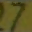

In [ ]:
X_val01[0]

In [ ]:
valAns[0]

array([[[128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128],
        ...,
        [103, 103, 104, ..., 107, 107, 107],
        [103, 103, 102, ..., 108, 107, 107],
        [ 99, 102, 102, ..., 107, 107, 107]],

       [[128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128],
        ...,
        [ 96,  97,  96, ...,  96,  96,  96],
        [ 96,  96,  96, ...,  97,  96,  96],
        [ 95,  96,  96, ...,  97,  96,  96]],

       [[128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128],
        [128, 128, 128, ..., 128, 128, 128],
        ...,
        [ 37,  36,  33, ...,  31,  31,  31],
        [ 37,  40,  34, ...,  31,  31,  34],
        [ 44,  44,  43, ...,  35,  35,  35]]], dtype=uint8)

In [ ]:
X_val02 = []
for k in range(len(valAns)):
  X_val02.append(np.transpose(valAns[k], (1, 2, 0)))

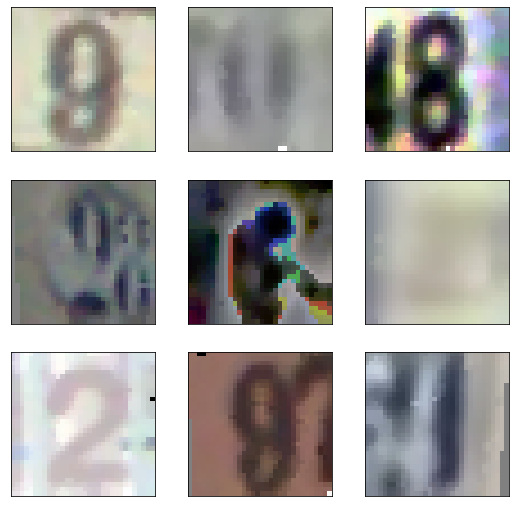

In [ ]:
plt.figure(figsize=(9,9))
k=0
for i in range(5, 14):
    k+=1
    plt.subplot(3,3,k)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_val02[i], cmap=plt.cm.binary)
plt.show()

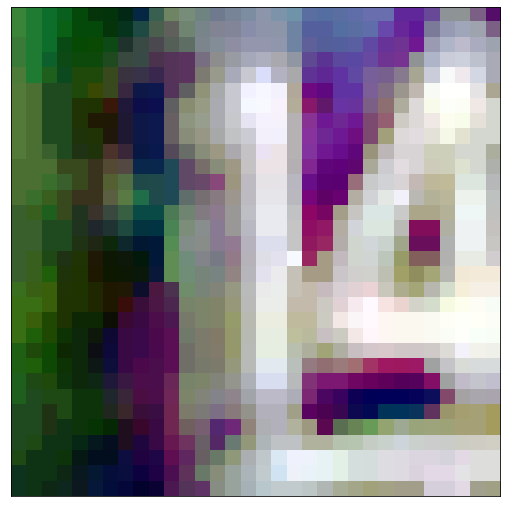

In [ ]:
plt.figure(figsize=(9,9))
plt.subplot(1, 1, 1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(X_val02[30], cmap=plt.cm.binary)
plt.show()

In [ ]:
X_val02 = np.array(X_val02)

######**train aug:**

In [ ]:
trainAns = []

In [ ]:
for i in range(len(X_train01)):
 trainAns.append(img_transform(X_train01[i]))

In [ ]:
trainAns

[tensor([[[210, 207, 210,  ..., 153, 125, 123],
          [218, 210, 210,  ..., 153, 129, 125],
          [219, 218, 218,  ..., 138, 131, 125],
          ...,
          [214, 210, 203,  ..., 201, 172, 170],
          [214, 214, 207,  ..., 201, 176, 166],
          [216, 216, 216,  ..., 184, 176,   0]],
 
         [[250, 245, 245,  ..., 149, 123, 123],
          [250, 250, 245,  ..., 149, 125, 123],
          [252, 250, 240,  ..., 135, 125, 123],
          ...,
          [221, 215, 205,  ..., 190, 169, 162],
          [218, 215, 206,  ..., 190, 175, 159],
          [218, 218, 215,  ..., 181, 175,   0]],
 
         [[253, 252, 252,  ..., 166, 144, 144],
          [250, 250, 250,  ..., 164, 144, 144],
          [250, 250, 247,  ..., 148, 144, 140],
          ...,
          [249, 247, 227,  ..., 225, 181, 178],
          [253, 249, 238,  ..., 225, 189, 176],
          [253, 253, 249,  ..., 197, 189,   0]]], dtype=torch.uint8),
 tensor([[[131, 132, 134,  ..., 131, 129, 129],
          [132,

In [ ]:
for p in range(len(trainAns)):
 trainAns[p] = trainAns[p].numpy()

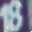

In [ ]:
X_train01[0]

In [ ]:
trainAns[0]

array([[[210, 207, 210, ..., 153, 125, 123],
        [218, 210, 210, ..., 153, 129, 125],
        [219, 218, 218, ..., 138, 131, 125],
        ...,
        [214, 210, 203, ..., 201, 172, 170],
        [214, 214, 207, ..., 201, 176, 166],
        [216, 216, 216, ..., 184, 176,   0]],

       [[250, 245, 245, ..., 149, 123, 123],
        [250, 250, 245, ..., 149, 125, 123],
        [252, 250, 240, ..., 135, 125, 123],
        ...,
        [221, 215, 205, ..., 190, 169, 162],
        [218, 215, 206, ..., 190, 175, 159],
        [218, 218, 215, ..., 181, 175,   0]],

       [[253, 252, 252, ..., 166, 144, 144],
        [250, 250, 250, ..., 164, 144, 144],
        [250, 250, 247, ..., 148, 144, 140],
        ...,
        [249, 247, 227, ..., 225, 181, 178],
        [253, 249, 238, ..., 225, 189, 176],
        [253, 253, 249, ..., 197, 189,   0]]], dtype=uint8)

In [ ]:
X_train02 = []
for k in range(len(trainAns)):
  X_train02.append(np.transpose(trainAns[k], (1, 2, 0)))

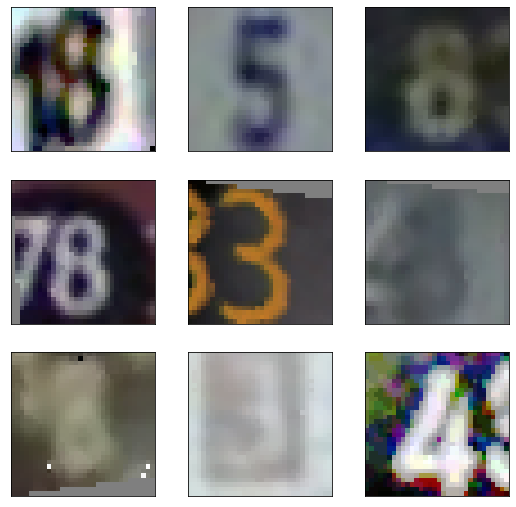

In [ ]:
plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train02[i], cmap=plt.cm.binary)
plt.show()

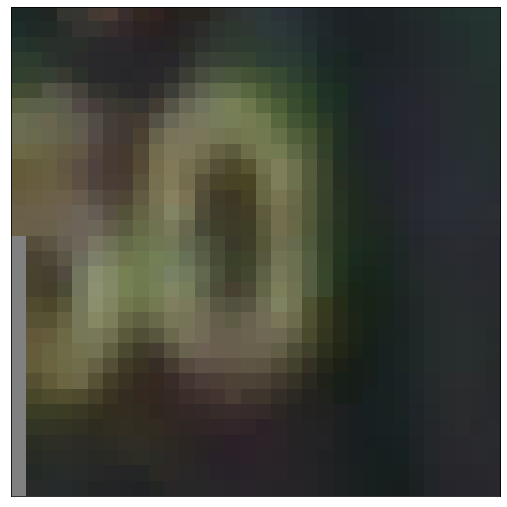

In [ ]:
plt.figure(figsize=(9,9))
plt.subplot(1, 1, 1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(X_train02[30], cmap=plt.cm.binary)
plt.show()

In [ ]:
X_train02 = np.array(X_train02)

######**test aug**

In [ ]:
testAns = []

In [ ]:
for i in range(len(X_test01)):
 testAns.append(np.transpose(img_transform(X_test01[i]).numpy(), (1, 2, 0)))

In [ ]:
testAns[0]

array([[[187, 181, 167],
        [183, 180, 163],
        [182, 180, 163],
        ...,
        [175, 168, 157],
        [170, 165, 156],
        [168, 163, 154]],

       [[187, 181, 167],
        [184, 181, 164],
        [183, 181, 164],
        ...,
        [158, 155, 149],
        [149, 147, 143],
        [147, 145, 142]],

       [[188, 182, 168],
        [188, 182, 168],
        [186, 184, 167],
        ...,
        [149, 142, 143],
        [141, 137, 138],
        [141, 136, 138]],

       ...,

       [[197, 185, 170],
        [198, 186, 172],
        [202, 193, 175],
        ...,
        [194, 187, 172],
        [193, 186, 175],
        [193, 186, 175]],

       [[199, 187, 172],
        [199, 187, 173],
        [207, 197, 179],
        ...,
        [127, 127, 127],
        [127, 127, 127],
        [127, 127, 127]],

       [[198, 186, 173],
        [206, 194, 178],
        [210, 199, 183],
        ...,
        [127, 127, 127],
        [127, 127, 127],
        [127, 127, 127]]

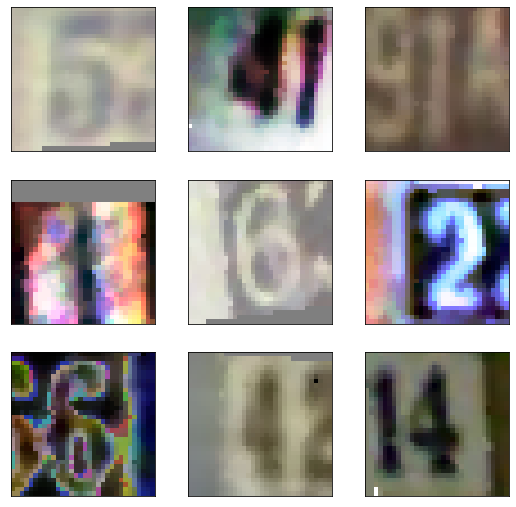

In [ ]:
plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testAns[i], cmap=plt.cm.binary)
plt.show()

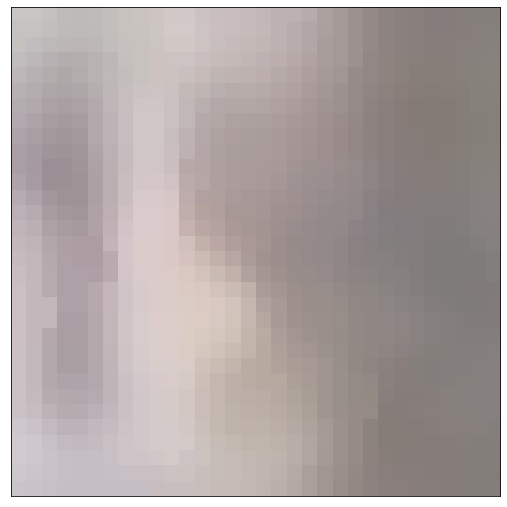

In [ ]:
plt.figure(figsize=(9,9))
plt.subplot(1, 1, 1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(testAns[30], cmap=plt.cm.binary)
plt.show()

In [ ]:
X_test02 = np.array(testAns)

####**Augmentation: DataGen**

**Инциализирован датагенератор - в зависимости от задачи генератора - свои политик внутри него. Так, например, dataGenAns3 для AA, datagenaAns1 - full aug, dataGen - BN data.**

In [ ]:
dataGen = ImageDataGenerator()

In [ ]:
dataGenAns1 = ImageDataGenerator(
    zoom_range=[0.9, 1.1],
    rotation_range=8,
    height_shift_range=0.10,
    shear_range=0.3
)

In [ ]:
dataGenAns2 = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.15,
    shear_range=0.4,
    zoom_range=[1.0,1.6]
)

In [ ]:
dataGenAns3 = ImageDataGenerator(
    zoom_range=[1.0,1.05]
)

####**BN to AA**

**BN for val and train data**

In [ ]:
# def BatchNorm(train_images, train_labels):
#   batch_size = 512
#   train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
#   train_dataset = train_dataset.shuffle(buffer_size = 1024, reshuffle_each_iteration=True)
#   train_dataset = train_dataset.batch(batch_size)
#   return train_dataset

trainData = BatchNorm(X_train02, y_train1)
valData = BatchNorm(X_val02, y_val1)

##**AlexNet (0)**

In [ ]:
keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32 ,(3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(64 ,(4, 4), activation='relu', padding='same'),
    keras.layers.Conv2D(64 ,(4, 4), activation='relu', padding='same'),
    keras.layers.Conv2D(64 ,(4, 4), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(rate=0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax'),
])

early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(lr=1e-3, amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint(
                   '/kaggle/working/best_cnn.h5',
                   save_best_only=True)



model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                        

In [ ]:
history37 = model.fit_generator(dataGenAns1.flow(X_train1, y_train1, batch_size=128),
                              epochs=70, validation_data=(X_val1, y_val1),
                              callbacks=[early_stopping, model_checkpoint])

Epoch 1/70


<ipython-input-32-823ed2965135>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history37 = model.fit_generator(dataGenAns1.flow(X_train1, y_train1, batch_size=128),


387/387 [==============================] - 34s 66ms/step - loss: 2.2608 - accuracy: 0.2299 - val_loss: 1.6131 - val_accuracy: 0.4960
Epoch 2/70
387/387 [==============================] - 25s 64ms/step - loss: 0.9104 - accuracy: 0.7118 - val_loss: 0.5701 - val_accuracy: 0.8400
Epoch 3/70
387/387 [==============================] - 25s 65ms/step - loss: 0.5901 - accuracy: 0.8208 - val_loss: 0.4444 - val_accuracy: 0.8680
Epoch 4/70
387/387 [==============================] - 25s 65ms/step - loss: 0.4726 - accuracy: 0.8595 - val_loss: 0.4180 - val_accuracy: 0.8620
Epoch 5/70
387/387 [==============================] - 26s 68ms/step - loss: 0.4128 - accuracy: 0.8787 - val_loss: 0.3410 - val_accuracy: 0.9060
Epoch 6/70
387/387 [==============================] - 25s 65ms/step - loss: 0.3726 - accuracy: 0.8921 - val_loss: 0.3083 - val_accuracy: 0.9140
Epoch 7/70
387/387 [==============================] - 25s 65ms/step - loss: 0.3482 - accuracy: 0.8979 - val_loss: 0.2844 - val_accuracy: 0.9220
Epo

In [ ]:
train_acc = history37.history['accuracy']
val_acc = history37.history['val_accuracy']

train_loss = history37.history['loss']
val_loss = history37.history['val_loss']

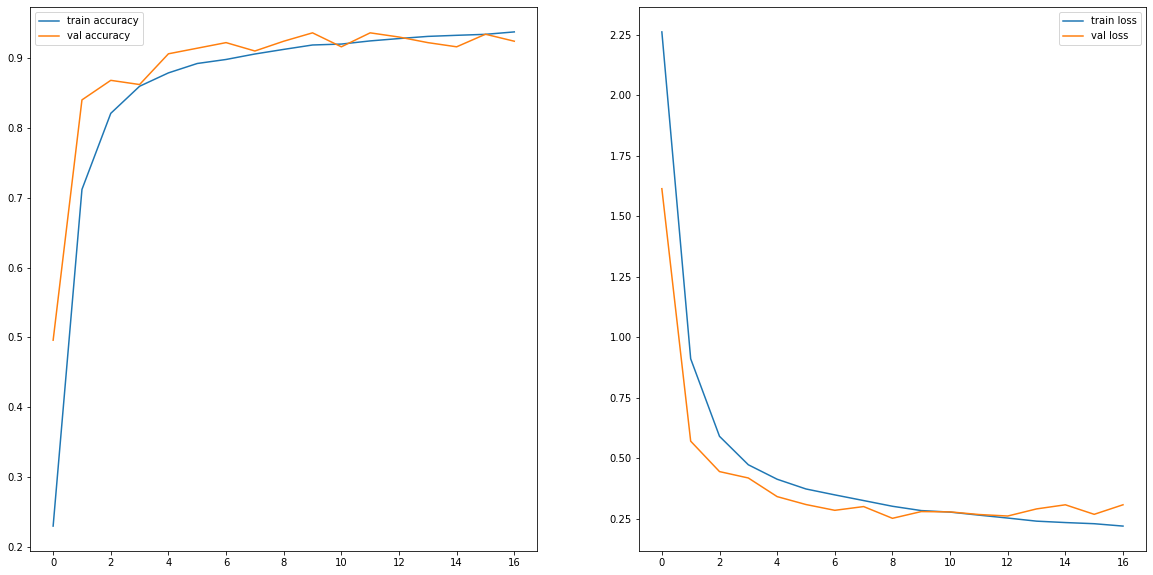

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='train accuracy')
plt.plot(val_acc, label='val accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()

plt.show()

In [ ]:
Result11 = model.predict(X_test1)

782/782 [==============================] - 2s 3ms/step


In [ ]:
df = pd.DataFrame(data={'Id': [i for i in range(len(Result11))], 'Category': np.argmax(Result11, axis=1)})

In [ ]:
df

Id  Category
0          0         5
1          1         4
2          2         1
3          3         1
4          4         6
...      ...       ...
24995  24995         1
24996  24996         1
24997  24997         0
24998  24998         9
24999  24999         2

[25000 rows x 2 columns]

In [ ]:
df.to_csv('pies_submission115.csv', index=False)

##**ConvNet 1**

####**ConvNet 1.1 full aug**

In [ ]:
X_train1.shape

(49500, 32, 32, 3)

In [ ]:
keras.backend.clear_session()


model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same',
                           activation='relu',
                           input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(64, (3, 3), padding='same',
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(128, (3, 3), padding='same',
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10,  activation='softmax')
])




early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(lr=1e-3, amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint(
                   '/kaggle/working/best_cnn.h5',
                   save_best_only=True)



model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        1

**Наилучший результат:**

**ConvNet 1 with datagenAns1**

In [ ]:
history11 = model.fit_generator(dataGenAns1.flow(X_train1, y_train1, batch_size=128),
                              epochs=70, validation_data=(X_val1, y_val1),
                              callbacks=[early_stopping, model_checkpoint])

Epoch 1/70


<ipython-input-26-b0d46653820d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history11 = model.fit_generator(dataGenAns1.flow(X_train1, y_train1, batch_size=128),


387/387 [==============================] - 32s 81ms/step - loss: 2.2164 - accuracy: 0.2053 - val_loss: 2.0683 - val_accuracy: 0.2740
Epoch 2/70
387/387 [==============================] - 31s 79ms/step - loss: 1.8098 - accuracy: 0.3460 - val_loss: 1.2886 - val_accuracy: 0.6080
Epoch 3/70
387/387 [==============================] - 29s 75ms/step - loss: 1.4042 - accuracy: 0.5027 - val_loss: 0.6310 - val_accuracy: 0.8260
Epoch 4/70
387/387 [==============================] - 29s 75ms/step - loss: 0.8728 - accuracy: 0.7130 - val_loss: 0.4748 - val_accuracy: 0.8720
Epoch 5/70
387/387 [==============================] - 29s 75ms/step - loss: 0.5564 - accuracy: 0.8365 - val_loss: 0.3668 - val_accuracy: 0.9000
Epoch 6/70
387/387 [==============================] - 29s 75ms/step - loss: 0.4596 - accuracy: 0.8678 - val_loss: 0.2685 - val_accuracy: 0.9280
Epoch 7/70
387/387 [==============================] - 29s 74ms/step - loss: 0.4058 - accuracy: 0.8829 - val_loss: 0.2870 - val_accuracy: 0.9160
Epo

In [ ]:
train_acc = history11.history['accuracy']
val_acc = history11.history['val_accuracy']

train_loss = history11.history['loss']
val_loss = history11.history['val_loss']

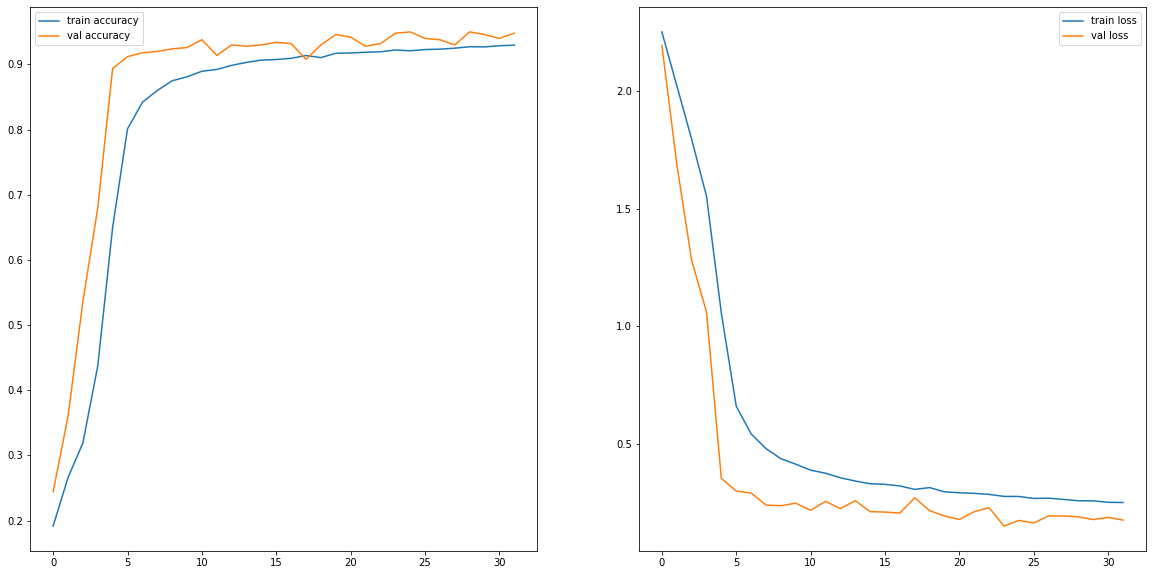

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='train accuracy')
plt.plot(val_acc, label='val accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()

plt.show()

In [ ]:
Result11 = model.predict(X_test1)

782/782 [==============================] - 4s 5ms/step


In [ ]:
Result11

array([[7.05626002e-09, 7.14283544e-07, 5.62613867e-09, ...,
        1.25092740e-07, 1.06684794e-07, 6.16511579e-06],
       [1.50988080e-05, 2.13808380e-02, 7.29717503e-05, ...,
        2.62291898e-04, 2.56406190e-03, 8.39089975e-02],
       [6.73578540e-07, 7.01879978e-01, 7.59885722e-07, ...,
        2.98107326e-01, 4.26201768e-06, 2.10390226e-06],
       ...,
       [9.98068750e-01, 5.19724290e-06, 2.95625568e-07, ...,
        1.20376722e-08, 3.09040865e-06, 1.92135153e-03],
       [6.52379867e-07, 4.74166313e-07, 2.64389182e-05, ...,
        8.62511934e-06, 1.24106182e-05, 9.99817669e-01],
       [3.55663443e-10, 2.18785426e-05, 9.99977112e-01, ...,
        4.32939196e-08, 6.34935704e-09, 1.56592179e-08]], dtype=float32)

In [ ]:
df = pd.DataFrame(data={'Id': [i for i in range(len(Result11))], 'Category': np.argmax(Result11, axis=1)})

In [ ]:
df

Id  Category
0          0         5
1          1         4
2          2         1
3          3         1
4          4         6
...      ...       ...
24995  24995         1
24996  24996         1
24997  24997         0
24998  24998         9
24999  24999         2

[25000 rows x 2 columns]

In [ ]:
df.to_csv('pies_submission115.csv', index=False)

####**ConvNet 1.2 full not aug**

In [ ]:
keras.backend.clear_session()


model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same',
                           activation='relu',
                           input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(64, (3, 3), padding='same',
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(128, (3, 3), padding='same',
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10,  activation='softmax')
])




early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(lr=1e-3, amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint(
                   '/kaggle/working/best_cnn.h5',
                   save_best_only=True)



model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history12 = model.fit_generator(dataGenAns.flow(X_train2, y_train2, batch_size=128),
                              epochs=70, validation_data=(X_val2, y_val2),
                              callbacks=[early_stopping, model_checkpoint])

<ipython-input-27-6a28e5f66c36>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history12 = model.fit_generator(dataGenAns.flow(X_train2, y_train2, batch_size=128),


Epoch 1/70
387/387 [==============================] - 40s 80ms/step - loss: 2.2161 - accuracy: 0.1949 - val_loss: 1.9603 - val_accuracy: 0.2960
Epoch 2/70
387/387 [==============================] - 26s 68ms/step - loss: 2.0265 - accuracy: 0.2349 - val_loss: 1.7072 - val_accuracy: 0.3600
Epoch 3/70
387/387 [==============================] - 26s 66ms/step - loss: 1.8978 - accuracy: 0.2844 - val_loss: 1.4797 - val_accuracy: 0.4500
Epoch 4/70
387/387 [==============================] - 25s 64ms/step - loss: 1.7322 - accuracy: 0.3441 - val_loss: 1.1843 - val_accuracy: 0.5360
Epoch 5/70
387/387 [==============================] - 25s 64ms/step - loss: 1.2637 - accuracy: 0.5668 - val_loss: 0.6326 - val_accuracy: 0.8120
Epoch 6/70
387/387 [==============================] - 25s 64ms/step - loss: 0.8499 - accuracy: 0.7367 - val_loss: 0.5097 - val_accuracy: 0.8580
Epoch 7/70
387/387 [==============================] - 25s 64ms/step - loss: 0.7031 - accuracy: 0.7846 - val_loss: 0.5706 - val_accuracy:

In [ ]:
train_acc = history12.history['accuracy']
val_acc = history12.history['val_accuracy']

train_loss = history12.history['loss']
val_loss = history12.history['val_loss']

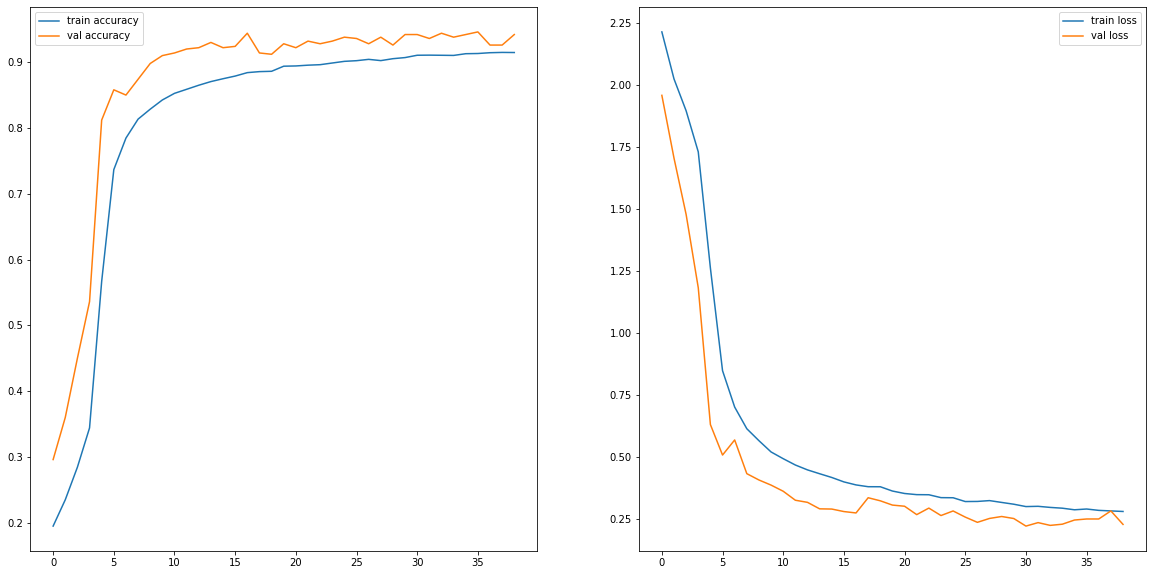

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='train accuracy')
plt.plot(val_acc, label='val accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()

plt.show()

In [ ]:
Result12 = model.predict(X_test2)

782/782 [==============================] - 2s 2ms/step


In [ ]:
Result12

array([[7.2030142e-12, 1.1656009e-09, 2.5060032e-11, ..., 4.5979842e-09,
        3.5608724e-11, 5.5475611e-09],
       [4.5018687e-08, 4.8407548e-04, 1.4837921e-07, ..., 2.6503903e-07,
        3.3814042e-06, 1.4253497e-05],
       [8.7416338e-06, 9.9996352e-01, 8.0984131e-07, ..., 1.3645653e-05,
        5.5536598e-06, 1.1154514e-06],
       ...,
       [9.9999857e-01, 8.6292808e-08, 7.7062148e-11, ..., 1.0776580e-10,
        1.0684036e-09, 1.3045859e-06],
       [1.2168030e-08, 2.7482208e-10, 6.5419243e-09, ..., 1.1885126e-10,
        9.2490255e-09, 9.9999917e-01],
       [7.3436489e-14, 6.4569790e-08, 9.9999988e-01, ..., 2.7940351e-11,
        6.9187657e-13, 8.8621966e-12]], dtype=float32)

In [ ]:
len(Result12)

25000

In [ ]:
df = pd.DataFrame(data={'Id': [i for i in range(len(Result12))], 'Category': np.argmax(Result12, axis=1)})

In [ ]:
df

Id  Category
0          0         5
1          1         4
2          2         1
3          3         1
4          4         6
...      ...       ...
24995  24995         1
24996  24996         1
24997  24997         0
24998  24998         9
24999  24999         2

[25000 rows x 2 columns]

In [ ]:
df.to_csv('pies_submission12.csv', index=False)

**Ссылка на диск:**
___

**Вывод:**

In [ ]:
df = pd.DataFrame(data={'Id': [i for i in range(len(Result11))], 'Category': np.argmax(Result11, axis=1)})

####**ConvNet 1.4 full aug - not datagen - AA**

In [ ]:
keras.backend.clear_session()


model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same',
                           activation='relu',
                           input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(64, (3, 3), padding='same',
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(128, (3, 3), padding='same',
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10,  activation='softmax')
])




early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(lr=1e-3, amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint(
                   '/kaggle/working/best_cnn.h5',
                   save_best_only=True)



model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history02 = model.fit_generator(dataGenAns3.flow(X_train02, y_train1, batch_size=128),
                              epochs=70, validation_data=(X_val02, y_val1),
                              callbacks=[early_stopping, model_checkpoint])

<ipython-input-65-0d68f74afcf4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history02 = model.fit_generator(dataGenAns3.flow(X_train02, y_train1, batch_size=128),


Epoch 1/70
1161/1161 [==============================] - 83s 64ms/step - loss: 1.7109 - accuracy: 0.3820 - val_loss: 1.0454 - val_accuracy: 0.6750
Epoch 2/70
1161/1161 [==============================] - 74s 63ms/step - loss: 0.6265 - accuracy: 0.8079 - val_loss: 0.4109 - val_accuracy: 0.8700
Epoch 3/70
1161/1161 [==============================] - 73s 63ms/step - loss: 0.3920 - accuracy: 0.8881 - val_loss: 0.2427 - val_accuracy: 0.9240
Epoch 4/70
1161/1161 [==============================] - 72s 62ms/step - loss: 0.3251 - accuracy: 0.9065 - val_loss: 0.2200 - val_accuracy: 0.9350
Epoch 5/70
1161/1161 [==============================] - 72s 62ms/step - loss: 0.2905 - accuracy: 0.9170 - val_loss: 0.1901 - val_accuracy: 0.9550
Epoch 6/70
1161/1161 [==============================] - 73s 63ms/step - loss: 0.2650 - accuracy: 0.9239 - val_loss: 0.1839 - val_accuracy: 0.9460
Epoch 7/70
1161/1161 [==============================] - 73s 63ms/step - loss: 0.2446 - accuracy: 0.9295 - val_loss: 0.1537 -

In [ ]:
history02 = model.fit_generator(dataGenAns3.flow(X_train02, y_train1, batch_size=128),
                              epochs=70, validation_data=(X_val02, y_val1),
                              callbacks=[early_stopping, model_checkpoint])

<ipython-input-67-0d68f74afcf4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history02 = model.fit_generator(dataGenAns3.flow(X_train02, y_train1, batch_size=128),


Epoch 1/70
1161/1161 [==============================] - 87s 65ms/step - loss: 1.6509 - accuracy: 0.4050 - val_loss: 0.7638 - val_accuracy: 0.7520
Epoch 2/70
1161/1161 [==============================] - 72s 62ms/step - loss: 0.5636 - accuracy: 0.8321 - val_loss: 0.3850 - val_accuracy: 0.9040
Epoch 3/70
1161/1161 [==============================] - 72s 62ms/step - loss: 0.3724 - accuracy: 0.8944 - val_loss: 0.3487 - val_accuracy: 0.9080
Epoch 4/70
1161/1161 [==============================] - 73s 63ms/step - loss: 0.3165 - accuracy: 0.9099 - val_loss: 0.3465 - val_accuracy: 0.9160
Epoch 5/70
1161/1161 [==============================] - 71s 61ms/step - loss: 0.2844 - accuracy: 0.9193 - val_loss: 0.3446 - val_accuracy: 0.9160
Epoch 6/70
1161/1161 [==============================] - 71s 61ms/step - loss: 0.2598 - accuracy: 0.9258 - val_loss: 0.3041 - val_accuracy: 0.9200
Epoch 7/70
1161/1161 [==============================] - 77s 66ms/step - loss: 0.2419 - accuracy: 0.9308 - val_loss: 0.3137 -

KeyboardInterrupt: ignored

In [ ]:
train_acc = history02.history['accuracy']
val_acc = history02.history['val_accuracy']

train_loss = history02.history['loss']
val_loss = history02.history['val_loss']

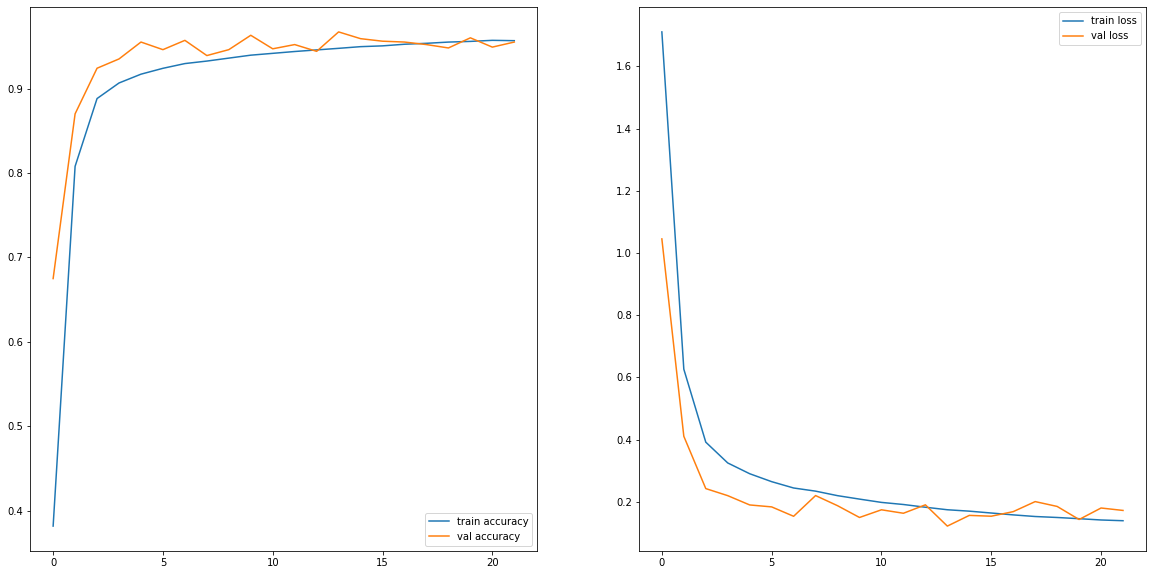

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='train accuracy')
plt.plot(val_acc, label='val accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()

plt.show()

In [ ]:
Result11 = model.predict(X_test1)

782/782 [==============================] - 2s 3ms/step


In [ ]:
Result11

array([[0.0070852 , 0.874008  , 0.03110982, ..., 0.01919807, 0.00775424,
        0.01823395],
       [0.00743109, 0.86896676, 0.03162803, ..., 0.02078766, 0.00807208,
        0.02036734],
       [0.00743623, 0.8703712 , 0.03144664, ..., 0.02020342, 0.0084607 ,
        0.01987279],
       ...,
       [0.0072778 , 0.8721821 , 0.03108986, ..., 0.020308  , 0.00816675,
        0.01950995],
       [0.00693122, 0.876222  , 0.02970032, ..., 0.01896352, 0.00806994,
        0.01913879],
       [0.00662479, 0.8786261 , 0.0302147 , ..., 0.01946677, 0.0075668 ,
        0.01745059]], dtype=float32)

In [ ]:
df = pd.DataFrame(data={'Id': [i for i in range(len(Result11))], 'Category': np.argmax(Result11, axis=1)})

In [ ]:
df

Id  Category
0          0         1
1          1         1
2          2         1
3          3         1
4          4         1
...      ...       ...
24995  24995         1
24996  24996         1
24997  24997         1
24998  24998         1
24999  24999         1

[25000 rows x 2 columns]

In [ ]:
df.to_csv('pies_submission11245.csv', index=False)

**Ссылка на диск:** https://disk.yandex.ru/d/Ikey71olRA-DYQ
___

**Вывод:**

##**ConvNet 2**

####**ConvNet 2.1 full aug**

In [ ]:
keras.backend.clear_session()


model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same',
                           activation='relu',
                           input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(64, (3, 3), padding='same',
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(128, (3, 3), padding='same',
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(258, (3, 3), padding='same',
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(258, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),


    keras.layers.Flatten(),
    keras.layers.Dense(2056, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10,  activation='softmax')
])




early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(lr=1e-3, amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint(
                   '/kaggle/working/best_cnn.h5',
                   save_best_only=True)



model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history21 = model.fit_generator(dataGenAns.flow(X_train1, y_train1, batch_size=128),
                              epochs=70, validation_data=(X_val1, y_val1),
                              callbacks=[early_stopping, model_checkpoint])

<ipython-input-64-4bba8ec05852>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history21 = model.fit_generator(dataGenAns.flow(X_train1, y_train1, batch_size=128),


Epoch 1/70
387/387 [==============================] - 30s 74ms/step - loss: 2.3270 - accuracy: 0.1811 - val_loss: 2.2016 - val_accuracy: 0.2000
Epoch 2/70
387/387 [==============================] - 27s 71ms/step - loss: 1.1009 - accuracy: 0.6320 - val_loss: 0.5348 - val_accuracy: 0.8320
Epoch 3/70
387/387 [==============================] - 27s 70ms/step - loss: 0.5194 - accuracy: 0.8430 - val_loss: 0.4111 - val_accuracy: 0.8860
Epoch 4/70
387/387 [==============================] - 27s 70ms/step - loss: 0.4207 - accuracy: 0.8741 - val_loss: 0.3396 - val_accuracy: 0.9120
Epoch 5/70
387/387 [==============================] - 27s 70ms/step - loss: 0.3661 - accuracy: 0.8915 - val_loss: 0.3246 - val_accuracy: 0.9100
Epoch 6/70
387/387 [==============================] - 28s 72ms/step - loss: 0.3376 - accuracy: 0.9006 - val_loss: 0.3579 - val_accuracy: 0.8940
Epoch 7/70
387/387 [==============================] - 37s 97ms/step - loss: 0.3152 - accuracy: 0.9068 - val_loss: 0.2758 - val_accuracy:

In [ ]:
train_acc = history21.history['accuracy']
val_acc = history21.history['val_accuracy']

train_loss = history21.history['loss']
val_loss = history21.history['val_loss']

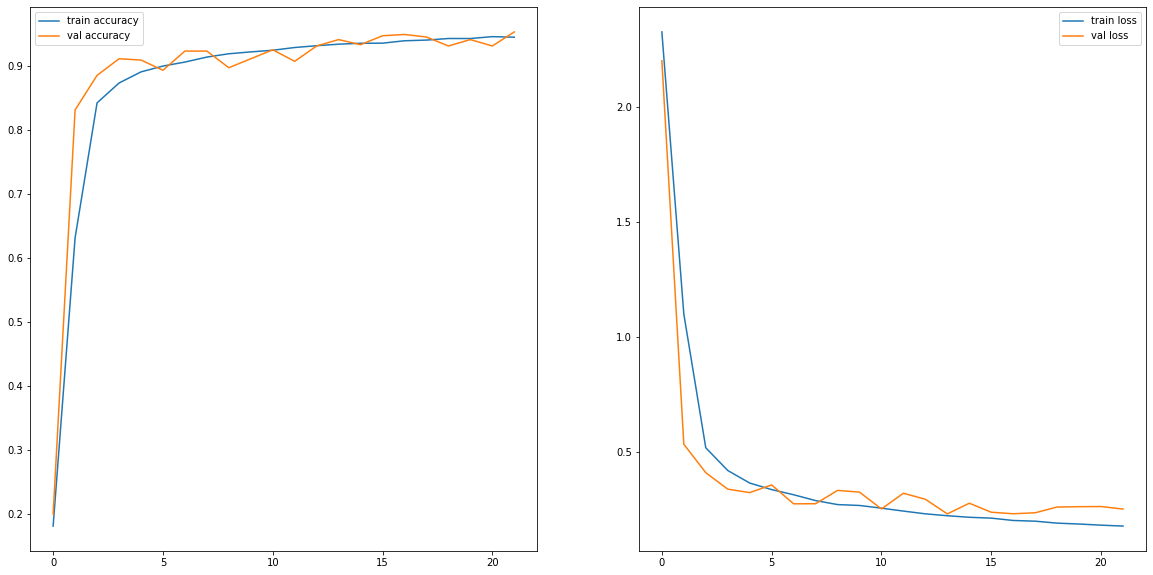

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='train accuracy')
plt.plot(val_acc, label='val accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()

plt.show()

In [ ]:
Result21 = model.predict(X_test1)

782/782 [==============================] - 3s 3ms/step


In [ ]:
Result21

array([[5.74077941e-09, 6.74651437e-06, 7.74422659e-09, ...,
        3.66693371e-07, 8.47450110e-10, 1.79524491e-07],
       [2.07184652e-08, 5.16228320e-04, 3.67940309e-08, ...,
        2.34448354e-08, 3.06568296e-07, 5.22585935e-07],
       [5.33780575e-09, 9.99802768e-01, 8.39958059e-09, ...,
        1.97241636e-04, 1.38503626e-08, 3.01105785e-09],
       ...,
       [9.99972343e-01, 4.05163746e-06, 1.25149597e-07, ...,
        2.31164975e-07, 2.99191100e-07, 1.37452462e-05],
       [4.90454170e-07, 4.72445827e-05, 4.96528992e-05, ...,
        2.65854828e-06, 4.04190250e-05, 9.99650121e-01],
       [1.96966336e-12, 5.97613621e-07, 9.99998927e-01, ...,
        1.00515265e-11, 3.43387471e-11, 2.72611794e-12]], dtype=float32)

In [ ]:
df = pd.DataFrame(data={'Id': [i for i in range(len(Result21))], 'Category': np.argmax(Result21, axis=1)})

In [ ]:
df

Id  Category
0          0         5
1          1         4
2          2         1
3          3         1
4          4         6
...      ...       ...
24995  24995         1
24996  24996         1
24997  24997         0
24998  24998         9
24999  24999         2

[25000 rows x 2 columns]

In [ ]:
df.to_csv('pies_submission21.csv', index=False)

####**ConvNet 2.2 full not aug**

In [ ]:
keras.backend.clear_session()


model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same',
                           activation='relu',
                           input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(64, (3, 3), padding='same',
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(128, (3, 3), padding='same',
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(258, (3, 3), padding='same',
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(258, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),


    keras.layers.Flatten(),
    keras.layers.Dense(2056, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10,  activation='softmax')
])




early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(lr=1e-3, amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint(
                   '/kaggle/working/best_cnn.h5',
                   save_best_only=True)



model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history22 = model.fit_generator(dataGenAns.flow(X_train2, y_train2, batch_size=128),
                              epochs=70, validation_data=(X_val2, y_val2),
                              callbacks=[early_stopping, model_checkpoint])

Epoch 1/70


<ipython-input-37-f982ce12494f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history22 = model.fit_generator(dataGenAns.flow(X_train2, y_train2, batch_size=128),


387/387 [==============================] - 27s 67ms/step - loss: 2.1230 - accuracy: 0.2633 - val_loss: 1.2542 - val_accuracy: 0.5620
Epoch 2/70
387/387 [==============================] - 25s 66ms/step - loss: 1.0584 - accuracy: 0.6541 - val_loss: 0.6546 - val_accuracy: 0.8160
Epoch 3/70
387/387 [==============================] - 26s 66ms/step - loss: 0.7423 - accuracy: 0.7648 - val_loss: 0.5280 - val_accuracy: 0.8460
Epoch 4/70
387/387 [==============================] - 25s 66ms/step - loss: 0.6197 - accuracy: 0.8058 - val_loss: 0.5237 - val_accuracy: 0.8480
Epoch 5/70
387/387 [==============================] - 27s 69ms/step - loss: 0.5573 - accuracy: 0.8293 - val_loss: 0.3682 - val_accuracy: 0.8860
Epoch 6/70
387/387 [==============================] - 26s 66ms/step - loss: 0.5070 - accuracy: 0.8440 - val_loss: 0.3831 - val_accuracy: 0.8940
Epoch 7/70
387/387 [==============================] - 26s 66ms/step - loss: 0.4720 - accuracy: 0.8553 - val_loss: 0.3900 - val_accuracy: 0.8920
Epo

In [ ]:
train_acc = history22.history['accuracy']
val_acc = history22.history['val_accuracy']

train_loss = history22.history['loss']
val_loss = history22.history['val_loss']

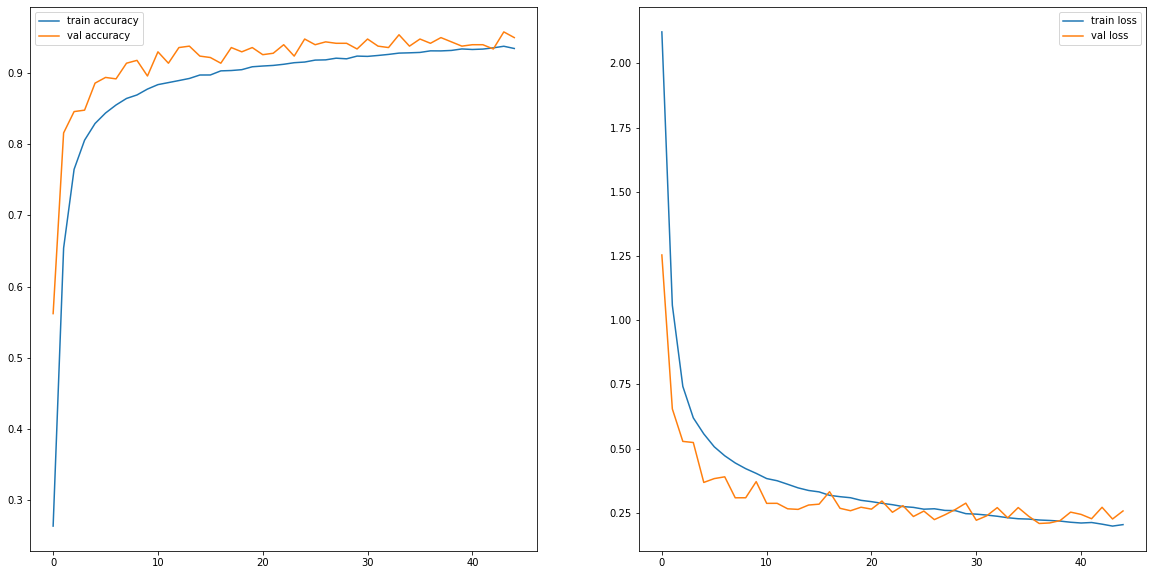

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='train accuracy')
plt.plot(val_acc, label='val accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()

plt.show()

In [ ]:
Result22 = model.predict(X_test2)

782/782 [==============================] - 2s 3ms/step


In [ ]:
Result22

array([[6.4749768e-11, 3.5276891e-08, 2.4485143e-11, ..., 1.9595019e-10,
        1.8122370e-09, 1.4643620e-09],
       [5.1764135e-05, 2.7195340e-02, 1.1700368e-04, ..., 2.0820966e-05,
        2.1751986e-03, 4.1247933e-04],
       [5.3699347e-05, 9.9851114e-01, 5.0596932e-06, ..., 2.8491137e-04,
        3.9729671e-04, 7.9343496e-05],
       ...,
       [9.9999988e-01, 7.8324716e-09, 6.2045663e-10, ..., 4.2232810e-12,
        3.3894445e-09, 1.0215357e-07],
       [5.0470383e-10, 1.2092982e-08, 4.2995193e-08, ..., 4.4577710e-09,
        3.1980882e-08, 9.9864072e-01],
       [2.6815104e-15, 1.2580162e-05, 9.9998724e-01, ..., 1.5887312e-10,
        2.5785769e-11, 2.8736230e-14]], dtype=float32)

In [ ]:
df = pd.DataFrame(data={'Id': [i for i in range(len(Result22))], 'Category': np.argmax(Result22, axis=1)})

In [ ]:
df

Id  Category
0          0         5
1          1         4
2          2         1
3          3         1
4          4         6
...      ...       ...
24995  24995         1
24996  24996         1
24997  24997         0
24998  24998         9
24999  24999         2

[25000 rows x 2 columns]

In [ ]:
df.to_csv('pies_submission22.csv', index=False)

##**ResNet (3)**

####**ResNet 3.1 full aug**

In [ ]:
#from keras import layers, Model

In [ ]:
keras.backend.clear_session()

def resnet_model(input_shape, num_classes=10):
    inputs = keras.Input(shape=input_shape,name="CNN")

    # 1st block
    x = layers.Conv2D(32,(3, 3), activation='relu')(inputs)
    x = layers.Conv2D(64,(3, 3), activation='relu')(x)
    block_1_output = layers.MaxPooling2D((3,3))(x)

    # 2nd block
    x = layers.Conv2D(64,(3, 3), activation='relu', padding='same')(block_1_output)
    x = layers.Conv2D(64,(3, 3), activation='relu', padding='same')(x)
    block_2_output = layers.add([x, block_1_output])

    # 3rd block
    x = layers.Conv2D(64,(3, 3), activation='relu', padding='same')(block_2_output)
    x = layers.Conv2D(64,(3, 3), activation='relu', padding='same')(x)
    block_3_output = layers.add([x, block_2_output])

    # output block
    x = layers.Conv2D(64,(3, 3), activation='relu')(block_3_output)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

model = resnet_model((32,32,3))


early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(lr=1e-3, amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint(
                   '/kaggle/working/best_cnn.h5',
                   save_best_only=True)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history31 = model.fit_generator(dataGenAns.flow(X_train1, y_train1, batch_size=128),
                              epochs=70, validation_data=(X_val1, y_val1),
                              callbacks=[early_stopping, model_checkpoint])

Epoch 1/70


<ipython-input-94-c8d717e9b642>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history31 = model.fit_generator(dataGenAns.flow(X_train1, y_train1, batch_size=128),


387/387 [==============================] - 27s 67ms/step - loss: 2.1708 - accuracy: 0.2229 - val_loss: 1.8617 - val_accuracy: 0.3280
Epoch 2/70
387/387 [==============================] - 32s 81ms/step - loss: 1.3844 - accuracy: 0.5270 - val_loss: 0.7909 - val_accuracy: 0.7560
Epoch 3/70
387/387 [==============================] - 26s 67ms/step - loss: 0.7337 - accuracy: 0.7718 - val_loss: 0.4653 - val_accuracy: 0.8560
Epoch 4/70
387/387 [==============================] - 39s 100ms/step - loss: 0.5076 - accuracy: 0.8481 - val_loss: 0.3637 - val_accuracy: 0.8840
Epoch 5/70
387/387 [==============================] - 29s 75ms/step - loss: 0.4212 - accuracy: 0.8733 - val_loss: 0.3346 - val_accuracy: 0.8980
Epoch 6/70
387/387 [==============================] - 25s 66ms/step - loss: 0.3728 - accuracy: 0.8907 - val_loss: 0.3030 - val_accuracy: 0.9200
Epoch 7/70
387/387 [==============================] - 31s 80ms/step - loss: 0.3350 - accuracy: 0.9013 - val_loss: 0.3100 - val_accuracy: 0.9120
Ep

In [ ]:
train_acc = history31.history['accuracy']
val_acc = history31.history['val_accuracy']

train_loss = history31.history['loss']
val_loss = history31.history['val_loss']

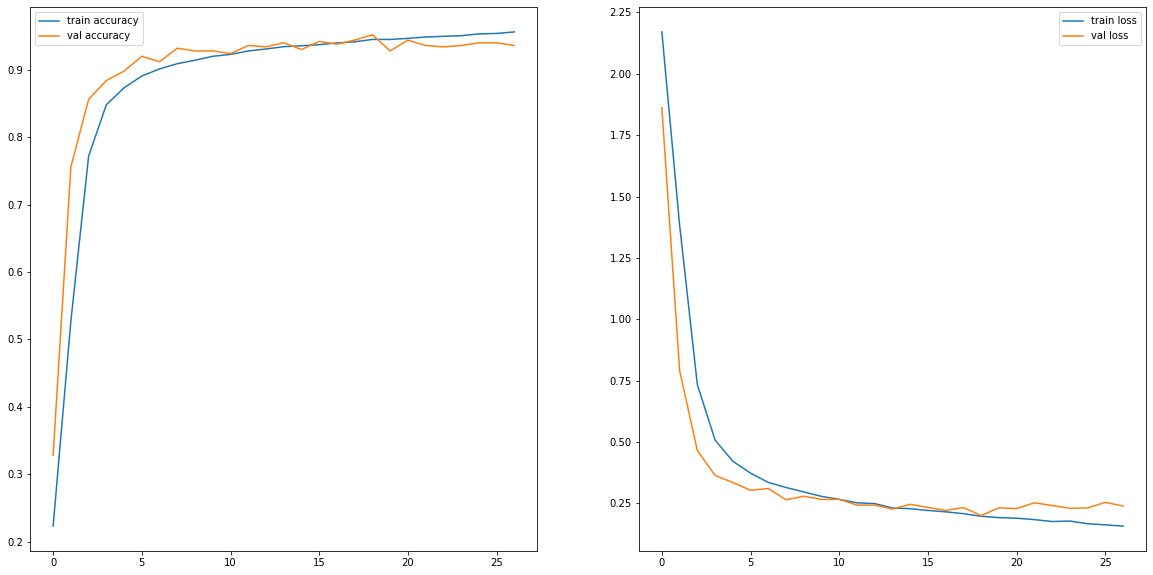

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='train accuracy')
plt.plot(val_acc, label='val accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()

plt.show()

In [ ]:
Result31 = model.predict(X_test1)

782/782 [==============================] - 2s 2ms/step


In [ ]:
Result31

array([[1.1989960e-07, 2.4072020e-05, 1.3825949e-06, ..., 1.6378575e-06,
        1.2446060e-07, 2.1358930e-05],
       [3.8677760e-07, 4.8860459e-04, 4.3722671e-06, ..., 2.7944161e-06,
        7.6436518e-06, 9.3854314e-06],
       [5.4694301e-06, 9.9996161e-01, 1.9214913e-06, ..., 2.3777548e-05,
        3.1090935e-06, 8.4437794e-08],
       ...,
       [9.9981529e-01, 3.4240078e-05, 8.4695594e-06, ..., 7.5711027e-06,
        8.8289261e-07, 9.8405442e-05],
       [1.6511657e-06, 2.7611992e-05, 3.0693907e-05, ..., 3.4910004e-06,
        4.1981373e-05, 9.9866450e-01],
       [2.3222426e-06, 7.8247761e-04, 9.9908149e-01, ..., 1.1387685e-05,
        9.9913605e-06, 1.4205633e-06]], dtype=float32)

In [ ]:
df = pd.DataFrame(data={'Id': [i for i in range(len(Result31))], 'Category': np.argmax(Result31, axis=1)})

In [ ]:
df

Id  Category
0          0         5
1          1         4
2          2         1
3          3         1
4          4         6
...      ...       ...
24995  24995         1
24996  24996         1
24997  24997         0
24998  24998         9
24999  24999         2

[25000 rows x 2 columns]

In [ ]:
df.to_csv('pies_submission31.csv', index=False)

####**ResNet 3.2 full not aug**

In [ ]:
#from keras import layers, Model

In [ ]:
keras.backend.clear_session()

def resnet_model(input_shape, num_classes=10):
    inputs = keras.Input(shape=input_shape,name="CNN")

    # 1st block
    x = layers.Conv2D(32,(3, 3), activation='relu')(inputs)
    x = layers.Conv2D(64,(3, 3), activation='relu')(x)
    block_1_output = layers.MaxPooling2D((3,3))(x)

    # 2nd block
    x = layers.Conv2D(64,(3, 3), activation='relu', padding='same')(block_1_output)
    x = layers.Conv2D(64,(3, 3), activation='relu', padding='same')(x)
    block_2_output = layers.add([x, block_1_output])

    # 3rd block
    x = layers.Conv2D(64,(3, 3), activation='relu', padding='same')(block_2_output)
    x = layers.Conv2D(64,(3, 3), activation='relu', padding='same')(x)
    block_3_output = layers.add([x, block_2_output])

    # output block
    x = layers.Conv2D(64,(3, 3), activation='relu')(block_3_output)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

model = resnet_model((32,32,3))


early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(lr=1e-3, amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint(
                   '/kaggle/working/best_cnn.h5',
                   save_best_only=True)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history32 = model.fit_generator(dataGenAns.flow(X_train2, y_train2, batch_size=128),
                              epochs=70, validation_data=(X_val2, y_val2),
                              callbacks=[early_stopping, model_checkpoint])

Epoch 1/70


<ipython-input-47-496a6c5b77d3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history32 = model.fit_generator(dataGenAns.flow(X_train2, y_train2, batch_size=128),


387/387 [==============================] - 26s 65ms/step - loss: 2.2369 - accuracy: 0.1901 - val_loss: 2.2123 - val_accuracy: 0.2160
Epoch 2/70
387/387 [==============================] - 26s 66ms/step - loss: 2.1504 - accuracy: 0.2329 - val_loss: 1.9605 - val_accuracy: 0.3080
Epoch 3/70
387/387 [==============================] - 24s 63ms/step - loss: 1.7530 - accuracy: 0.3850 - val_loss: 1.3140 - val_accuracy: 0.5560
Epoch 4/70
387/387 [==============================] - 24s 63ms/step - loss: 1.1830 - accuracy: 0.6104 - val_loss: 0.8172 - val_accuracy: 0.7440
Epoch 5/70
387/387 [==============================] - 25s 63ms/step - loss: 0.8530 - accuracy: 0.7271 - val_loss: 0.6133 - val_accuracy: 0.8240
Epoch 6/70
387/387 [==============================] - 25s 63ms/step - loss: 0.6981 - accuracy: 0.7803 - val_loss: 0.5284 - val_accuracy: 0.8260
Epoch 7/70
387/387 [==============================] - 24s 63ms/step - loss: 0.6135 - accuracy: 0.8100 - val_loss: 0.4640 - val_accuracy: 0.8540
Epo

In [ ]:
train_acc = history32.history['accuracy']
val_acc = history32.history['val_accuracy']

train_loss = history32.history['loss']
val_loss = history32.history['val_loss']

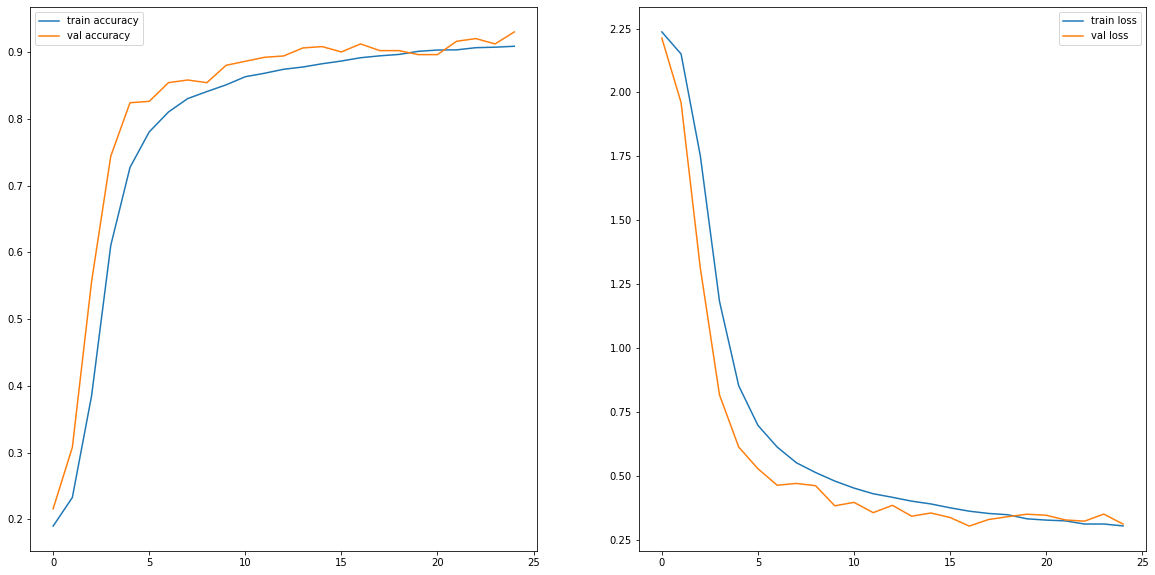

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='train accuracy')
plt.plot(val_acc, label='val accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()

plt.show()

In [ ]:
Result32 = model.predict(X_test2)

782/782 [==============================] - 2s 2ms/step


In [ ]:
Result32

array([[6.77401357e-10, 2.66998171e-07, 9.79182868e-09, ...,
        5.82131854e-09, 4.36937125e-10, 5.83558135e-09],
       [2.69430806e-03, 1.32363951e-02, 3.64291860e-04, ...,
        1.61464966e-04, 1.07187754e-03, 1.35136617e-03],
       [3.46594788e-05, 9.99287069e-01, 3.99874853e-06, ...,
        6.31588628e-04, 1.38309015e-05, 2.33624974e-06],
       ...,
       [9.99995708e-01, 5.72855981e-07, 8.74223538e-09, ...,
        1.26333415e-08, 1.10313671e-07, 2.01435023e-06],
       [7.01008616e-07, 2.64548675e-07, 5.14376870e-06, ...,
        2.36594495e-08, 3.43276520e-06, 9.99918222e-01],
       [1.73163116e-07, 1.24458675e-05, 9.99960780e-01, ...,
        1.09535040e-05, 5.61525758e-06, 9.19085949e-07]], dtype=float32)

In [ ]:
df = pd.DataFrame(data={'Id': [i for i in range(len(Result32))], 'Category': np.argmax(Result32, axis=1)})

In [ ]:
df

Id  Category
0          0         5
1          1         4
2          2         1
3          3         1
4          4         6
...      ...       ...
24995  24995         1
24996  24996         1
24997  24997         0
24998  24998         9
24999  24999         2

[25000 rows x 2 columns]

In [ ]:
df.to_csv('pies_submission32.csv', index=False)

##**ResNet BN (4)**

####**ResNet BN 4.1 full aug**

In [ ]:
#from keras import layers, Model

In [ ]:
keras.backend.clear_session()

def resnet_model_batch_normalization(input_shape, num_classes=10):
    inputs = keras.Input(shape=input_shape,name="CNN")

    # 1st block
    x = layers.Conv2D(32,(3, 3), activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64,(3, 3), activation='relu')(x)
    block_1_output = layers.MaxPooling2D((3,3))(x)

    # 2nd block
    x = layers.Conv2D(64,(3, 3), activation='relu', padding='same')(block_1_output)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64,(3, 3), activation='relu', padding='same')(x)
    block_2_output = layers.add([x, block_1_output])

    # 3rd block
    x = layers.Conv2D(64,(3, 3), activation='relu', padding='same')(block_2_output)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64,(3, 3), activation='relu', padding='same')(x)
    block_3_output = layers.add([x, block_2_output])

    # output block
    x = layers.Conv2D(64,(3, 3), activation='relu')(block_3_output)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model


model = resnet_model_batch_normalization((32,32,3))


early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(lr=1e-3, amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint(
                   '/kaggle/working/best_cnn.h5',
                   save_best_only=True)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history41 = model.fit_generator(dataGenAns.flow(X_train1, y_train1, batch_size=128),
                              epochs=70, validation_data=(X_val1, y_val1),
                              callbacks=[early_stopping, model_checkpoint])

Epoch 1/70


<ipython-input-81-366965f7c78b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history41 = model.fit_generator(dataGenAns.flow(X_train1, y_train1, batch_size=128),


387/387 [==============================] - 29s 72ms/step - loss: 1.3669 - accuracy: 0.5236 - val_loss: 1.4493 - val_accuracy: 0.5420
Epoch 2/70
387/387 [==============================] - 39s 100ms/step - loss: 0.4556 - accuracy: 0.8651 - val_loss: 0.4086 - val_accuracy: 0.8840
Epoch 3/70
387/387 [==============================] - 26s 67ms/step - loss: 0.3499 - accuracy: 0.8979 - val_loss: 0.3999 - val_accuracy: 0.8760
Epoch 4/70
387/387 [==============================] - 33s 85ms/step - loss: 0.3001 - accuracy: 0.9128 - val_loss: 0.3627 - val_accuracy: 0.8980
Epoch 5/70
387/387 [==============================] - 27s 70ms/step - loss: 0.2750 - accuracy: 0.9211 - val_loss: 0.3297 - val_accuracy: 0.8960
Epoch 6/70
387/387 [==============================] - 35s 91ms/step - loss: 0.2584 - accuracy: 0.9276 - val_loss: 0.2952 - val_accuracy: 0.9120
Epoch 7/70
387/387 [==============================] - 26s 68ms/step - loss: 0.2405 - accuracy: 0.9317 - val_loss: 0.3142 - val_accuracy: 0.9260
Ep

In [ ]:
train_acc = history41.history['accuracy']
val_acc = history41.history['val_accuracy']

train_loss = history41.history['loss']
val_loss = history41.history['val_loss']

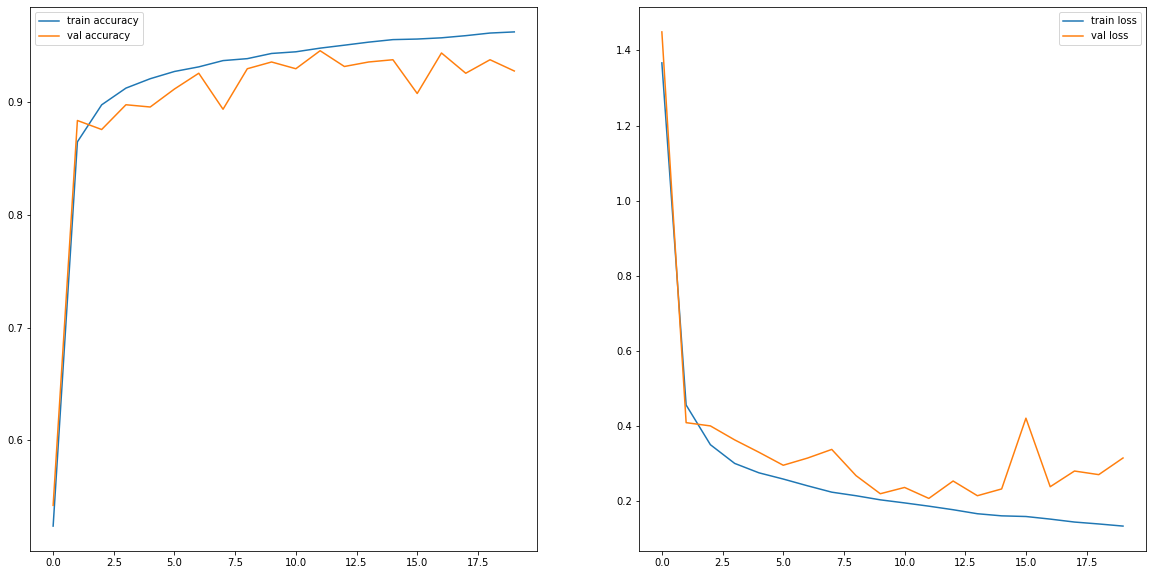

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='train accuracy')
plt.plot(val_acc, label='val accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()

plt.show()

In [ ]:
Result41 = model.predict(X_test1)

782/782 [==============================] - 2s 3ms/step


In [ ]:
Result41

array([[4.6869227e-06, 4.7796260e-05, 4.4166709e-06, ..., 8.9864343e-06,
        1.4595383e-07, 6.7462088e-06],
       [5.3184276e-04, 8.7416982e-03, 7.5028324e-04, ..., 2.4946590e-04,
        2.4703483e-03, 3.6339883e-03],
       [1.1801339e-06, 9.9931133e-01, 4.7089889e-06, ..., 6.7237421e-04,
        1.2445099e-06, 1.8896886e-06],
       ...,
       [9.9996638e-01, 6.3267348e-06, 6.2982514e-07, ..., 3.2212401e-07,
        1.6853048e-06, 1.3797211e-05],
       [2.2933544e-07, 1.3332996e-06, 8.6421375e-07, ..., 4.7779313e-08,
        4.0093505e-07, 9.9996483e-01],
       [3.0776994e-06, 6.2592683e-04, 9.9903715e-01, ..., 4.5945485e-06,
        3.7068526e-06, 2.1722855e-07]], dtype=float32)

In [ ]:
df = pd.DataFrame(data={'Id': [i for i in range(len(Result41))], 'Category': np.argmax(Result41, axis=1)})

In [ ]:
df

Id  Category
0          0         5
1          1         4
2          2         1
3          3         1
4          4         6
...      ...       ...
24995  24995         1
24996  24996         1
24997  24997         0
24998  24998         9
24999  24999         2

[25000 rows x 2 columns]

In [ ]:
df.to_csv('pies_submission41.csv', index=False)

####**ResNet BN 4.2 full not aug**

In [ ]:
#from keras import layers, Model

In [ ]:
keras.backend.clear_session()

def resnet_model_batch_normalization(input_shape, num_classes=10):
    inputs = keras.Input(shape=input_shape,name="CNN")

    # 1st block
    x = layers.Conv2D(32,(3, 3), activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64,(3, 3), activation='relu')(x)
    block_1_output = layers.MaxPooling2D((3,3))(x)

    # 2nd block
    x = layers.Conv2D(64,(3, 3), activation='relu', padding='same')(block_1_output)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64,(3, 3), activation='relu', padding='same')(x)
    block_2_output = layers.add([x, block_1_output])

    # 3rd block
    x = layers.Conv2D(64,(3, 3), activation='relu', padding='same')(block_2_output)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64,(3, 3), activation='relu', padding='same')(x)
    block_3_output = layers.add([x, block_2_output])

    # output block
    x = layers.Conv2D(64,(3, 3), activation='relu')(block_3_output)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model


model = resnet_model_batch_normalization((32,32,3))


early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(lr=1e-3, amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint(
                   '/kaggle/working/best_cnn.h5',
                   save_best_only=True)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history42 = model.fit_generator(dataGenAns.flow(X_train2, y_train2, batch_size=128),
                              epochs=70, validation_data=(X_val2, y_val2),
                              callbacks=[early_stopping, model_checkpoint])

Epoch 1/70


<ipython-input-57-97a5948fb54a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history42 = model.fit_generator(dataGenAns.flow(X_train2, y_train2, batch_size=128),


387/387 [==============================] - 33s 83ms/step - loss: 2.0110 - accuracy: 0.2766 - val_loss: 1.9303 - val_accuracy: 0.3180
Epoch 2/70
387/387 [==============================] - 25s 64ms/step - loss: 1.0528 - accuracy: 0.6482 - val_loss: 0.7189 - val_accuracy: 0.7720
Epoch 3/70
387/387 [==============================] - 26s 67ms/step - loss: 0.6654 - accuracy: 0.7940 - val_loss: 0.5458 - val_accuracy: 0.8500
Epoch 4/70
387/387 [==============================] - 25s 63ms/step - loss: 0.5362 - accuracy: 0.8348 - val_loss: 0.4380 - val_accuracy: 0.8660
Epoch 5/70
387/387 [==============================] - 25s 63ms/step - loss: 0.4714 - accuracy: 0.8574 - val_loss: 0.3921 - val_accuracy: 0.8800
Epoch 6/70
387/387 [==============================] - 24s 63ms/step - loss: 0.4316 - accuracy: 0.8705 - val_loss: 0.3530 - val_accuracy: 0.9080
Epoch 7/70
387/387 [==============================] - 25s 63ms/step - loss: 0.4029 - accuracy: 0.8797 - val_loss: 0.3618 - val_accuracy: 0.9020
Epo

In [ ]:
train_acc = history42.history['accuracy']
val_acc = history42.history['val_accuracy']

train_loss = history42.history['loss']
val_loss = history42.history['val_loss']

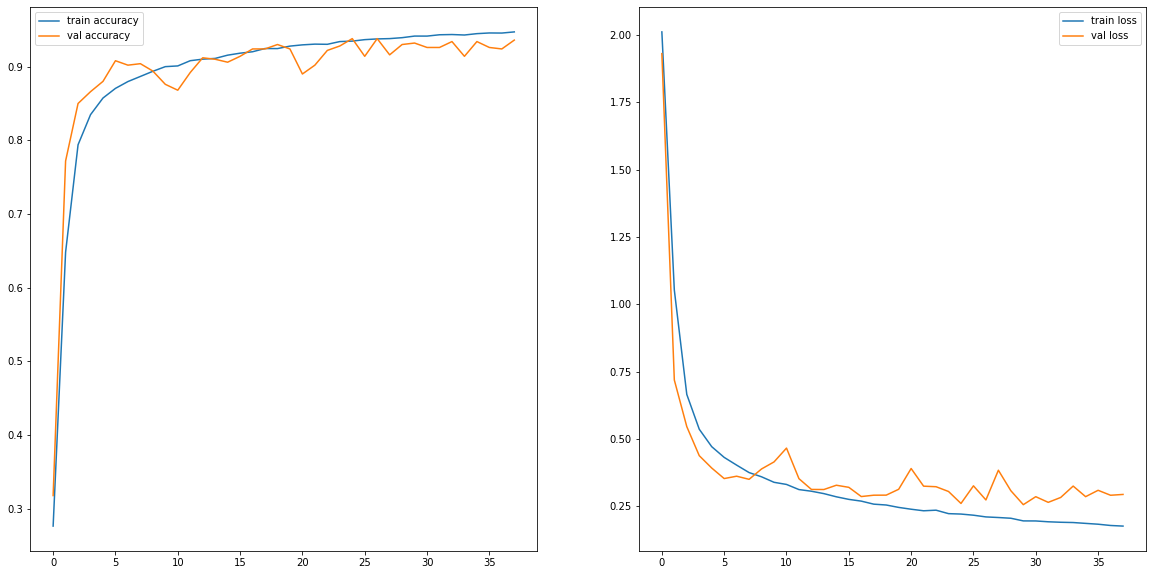

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='train accuracy')
plt.plot(val_acc, label='val accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()

plt.show()

In [ ]:
Result42 = model.predict(X_test2)

782/782 [==============================] - 2s 2ms/step


In [ ]:
Result42

array([[1.4033199e-07, 4.4490343e-06, 2.6934721e-08, ..., 1.4137956e-06,
        1.0439284e-09, 2.3129985e-06],
       [7.4099394e-06, 1.0891692e-04, 1.7789034e-07, ..., 1.6997289e-07,
        3.0719686e-06, 6.4554661e-05],
       [2.0306472e-06, 9.9783343e-01, 1.8455887e-06, ..., 2.1213798e-03,
        4.8757170e-06, 4.2263048e-07],
       ...,
       [9.9998391e-01, 1.5655681e-06, 1.0674659e-08, ..., 1.8248583e-08,
        1.7365457e-08, 1.4493803e-05],
       [3.5654990e-09, 1.1494149e-08, 3.6131127e-09, ..., 1.0183789e-09,
        3.4646256e-08, 9.9991190e-01],
       [8.5988730e-11, 2.1590349e-04, 9.9978131e-01, ..., 2.3500336e-08,
        3.6710790e-07, 9.2288033e-10]], dtype=float32)

In [ ]:
df = pd.DataFrame(data={'Id': [i for i in range(len(Result42))], 'Category': np.argmax(Result42, axis=1)})

In [ ]:
df

Id  Category
0          0         5
1          1         4
2          2         1
3          3         1
4          4         6
...      ...       ...
24995  24995         1
24996  24996         1
24997  24997         0
24998  24998         9
24999  24999         2

[25000 rows x 2 columns]

In [ ]:
df.to_csv('pies_submission42.csv', index=False)

##**ConvNet(1) with s-c (5)**

**only full aug*

In [ ]:
def conv_net_1_1():
    inputs = keras.Input(shape=(32, 32, 3))

    x = keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Dropout(0.3)(x)
    block_1_output = layers.add([x])

    block_2 = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(block_1_output)
    block_2 = keras.layers.MaxPooling2D((2, 2))(block_2)

    x = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(block_1_output)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Dropout(0.3)(x)
    block_2_output = layers.add([x, block_2])

    block_3 = keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(block_2_output)
    block_3 = keras.layers.MaxPooling2D((2, 2))(block_3)

    x = keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(block_2_output)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Dropout(0.3)(x)
    block_3_output = layers.add([x, block_3])

    x = keras.layers.Flatten()(block_3_output)
    x = keras.layers.Dense(128, activation='relu')(x)
    x = keras.layers.Dropout(0.4)(x)
    outputs = keras.layers.Dense(10,  activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model


model = conv_net_1_1()
early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(lr=1e-3, amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint(
                   '/kaggle/working/best_cnn.h5',
                   save_best_only=True)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history02 = model.fit_generator(dataGenAns3.flow(X_train02, y_train1, batch_size=128),
                               epochs=70, validation_data=(X_val02, y_val1),
                               callbacks=[early_stopping, model_checkpoint])

Epoch 1/70


<ipython-input-70-5f00a76ae3c7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history02 = model.fit_generator(dataGenAns3.flow(X_train02, y_train1, batch_size=128),


387/387 [==============================] - 35s 69ms/step - loss: 2.2198 - accuracy: 0.2069 - val_loss: 2.0334 - val_accuracy: 0.2760
Epoch 2/70
387/387 [==============================] - 25s 65ms/step - loss: 1.9001 - accuracy: 0.2926 - val_loss: 1.6611 - val_accuracy: 0.4460
Epoch 3/70
387/387 [==============================] - 25s 66ms/step - loss: 1.5436 - accuracy: 0.4396 - val_loss: 0.9930 - val_accuracy: 0.6880
Epoch 4/70
387/387 [==============================] - 29s 74ms/step - loss: 0.9400 - accuracy: 0.6830 - val_loss: 0.5626 - val_accuracy: 0.8420
Epoch 5/70
387/387 [==============================] - 25s 65ms/step - loss: 0.5711 - accuracy: 0.8314 - val_loss: 0.4515 - val_accuracy: 0.8560
Epoch 6/70
387/387 [==============================] - 25s 65ms/step - loss: 0.4538 - accuracy: 0.8691 - val_loss: 0.3890 - val_accuracy: 0.8760
Epoch 7/70
387/387 [==============================] - 26s 67ms/step - loss: 0.3881 - accuracy: 0.8873 - val_loss: 0.3710 - val_accuracy: 0.8820
Epo

In [ ]:
train_acc = history02.history['accuracy']
val_acc = history02.history['val_accuracy']

train_loss = history02.history['loss']
val_loss = history02.history['val_loss']

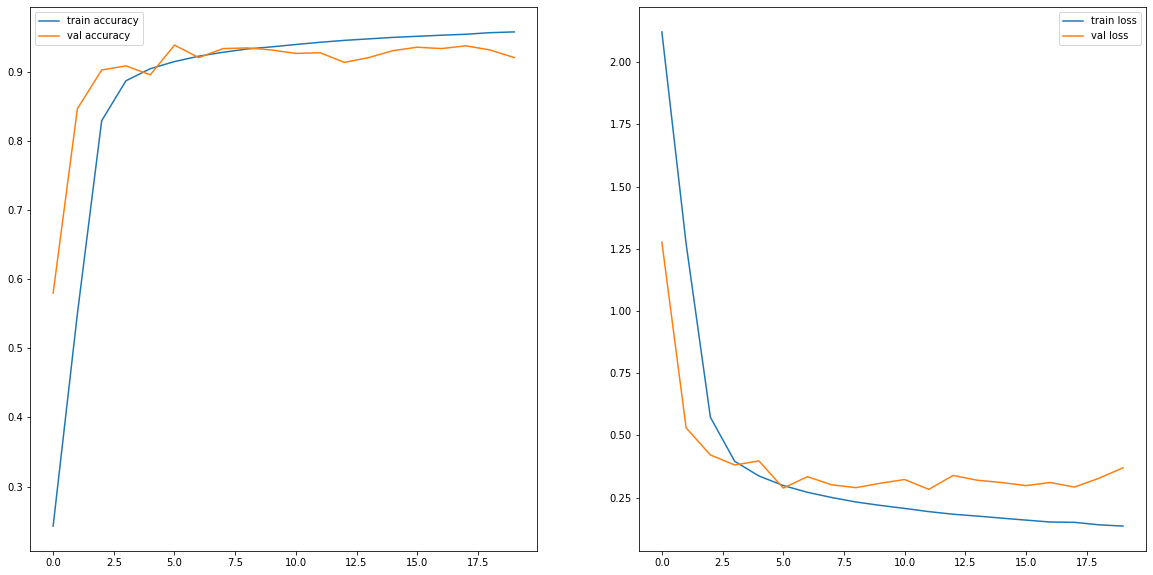

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='train accuracy')
plt.plot(val_acc, label='val accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()

plt.show()



In [ ]:
Result11 = model.predict(X_test02)

782/782 [==============================] - 3s 3ms/step


In [ ]:
Result11

array([[0.0070852 , 0.874008  , 0.03110982, ..., 0.01919807, 0.00775424,
        0.01823395],
       [0.00743109, 0.86896676, 0.03162803, ..., 0.02078766, 0.00807208,
        0.02036734],
       [0.00743623, 0.8703712 , 0.03144664, ..., 0.02020342, 0.0084607 ,
        0.01987279],
       ...,
       [0.0072778 , 0.8721821 , 0.03108986, ..., 0.020308  , 0.00816675,
        0.01950995],
       [0.00693122, 0.876222  , 0.02970032, ..., 0.01896352, 0.00806994,
        0.01913879],
       [0.00662479, 0.8786261 , 0.0302147 , ..., 0.01946677, 0.0075668 ,
        0.01745059]], dtype=float32)

In [ ]:
df = pd.DataFrame(data={'Id': [i for i in range(len(Result11))], 'Category': np.argmax(Result11, axis=1)})

In [ ]:
df

Id  Category
0          0         1
1          1         1
2          2         1
3          3         1
4          4         1
...      ...       ...
24995  24995         1
24996  24996         1
24997  24997         1
24998  24998         1
24999  24999         1

[25000 rows x 2 columns]

In [ ]:
df.to_csv('pies_submission112455.csv', index=False)

##**WideResNet 28-10 (6)**

####**WideResNet 28-10 7.1 full aug**

In [ ]:
#from keras import layers, Model

In [ ]:
keras.backend.clear_session()

def model_WRN_28_10(input_shape, num_classes=10):
    inputs = keras.Input(shape=input_shape,name="WRN_28_10")

    # 1st block
    x = layers.Conv2D(32,(3, 3), activation='relu',name="Conv2D_1")(inputs)
    x = layers.BatchNormalization(name='BatchNormalization_1')(x)

    activation_1 = layers.Activation('relu', name='Activation_1')(x)

    x = layers.Conv2D(32,(3, 3), activation='relu',name="Conv2D_3",padding='same')(activation_1)
    x = layers.BatchNormalization(name='BatchNormalization_2')(x)
    x = layers.Activation('relu', name='Activation_2')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_4",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_3')(x)
    x = layers.Activation('relu', name='Activation_3')(x)

    conv2D_2 = layers.Conv2D(64,(5, 5), activation='relu',name="Conv2D_2",padding='same')(activation_1)

    merge_1 = layers.add([conv2D_2, x])


    # 2nd block
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_5",padding='same')(merge_1)
    x = layers.BatchNormalization(name='BatchNormalization_4')(x)
    x = layers.Activation('relu', name='Activation_4')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_6",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_5')(x)
    x = layers.Activation('relu', name='Activation_5')(x)

    merge_2 = layers.add([merge_1, x])

    # 3rd block
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_7",padding='same')(merge_2)
    x = layers.BatchNormalization(name='BatchNormalization_6')(x)
    x = layers.Activation('relu', name='Activation_6')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_8",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_7')(x)
    x = layers.Activation('relu', name='Activation_7')(x)

    merge_3 = layers.add([merge_2, x])

    # 4th block
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_9",padding='same')(merge_3)
    x = layers.BatchNormalization(name='BatchNormalization_8')(x)
    x = layers.Activation('relu', name='Activation_8')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_10",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_9')(x)
    x = layers.Activation('relu', name='Activation_9')(x)

    merge_4 = layers.add([merge_3, x])

    # 5th block
    max_pooling2D_1 = layers.MaxPooling2D((3,3),name="MaxPooling_1")(merge_4)

    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_12",padding='same')(max_pooling2D_1)
    x = layers.BatchNormalization(name='BatchNormalization_10')(x)
    x = layers.Activation('relu', name='Activation_10')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_13",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_11')(x)
    x = layers.Activation('relu', name='Activation_11')(x)

    conv2D_11 = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_11",padding='same')(max_pooling2D_1)

    merge_5 = layers.add([conv2D_11, x])


    # 6th block
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_14",padding='same')(merge_5)
    x = layers.BatchNormalization(name='BatchNormalization_12')(x)
    x = layers.Activation('relu', name='Activation_12')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_15",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_13')(x)
    x = layers.Activation('relu', name='Activation_13')(x)

    merge_6 = layers.add([merge_5, x])

    # 7th block
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_16",padding='same')(merge_6)
    x = layers.BatchNormalization(name='BatchNormalization_14')(x)
    x = layers.Activation('relu', name='Activation_14')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_17",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_15')(x)
    x = layers.Activation('relu', name='Activation_15')(x)

    merge_7 = layers.add([merge_6, x])

    # 8th block
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_18",padding='same')(merge_7)
    x = layers.BatchNormalization(name='BatchNormalization_16')(x)
    x = layers.Activation('relu', name='Activation_16')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_19",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_17')(x)
    x = layers.Activation('relu', name='Activation_17')(x)

    merge_8 = layers.add([merge_7, x])

    # 9th block
    max_pooling2D_2 = layers.MaxPooling2D((3,3),name="MaxPooling_2")(merge_8)

    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_21",padding='same')(max_pooling2D_2)
    x = layers.BatchNormalization(name='BatchNormalization_18')(x)
    x = layers.Activation('relu', name='Activation_18')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_22",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_19')(x)
    x = layers.Activation('relu', name='Activation_19')(x)

    conv2D_20 = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_20",padding='same')(max_pooling2D_2)

    merge_9 = layers.add([conv2D_20, x])

    # 10th block
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_23",padding='same')(merge_9)
    x = layers.BatchNormalization(name='BatchNormalization_20')(x)
    x = layers.Activation('relu', name='Activation_20')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_24",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_21')(x)
    x = layers.Activation('relu', name='Activation_21')(x)

    merge_10 = layers.add([merge_9, x])

    # 11th block
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_25",padding='same')(merge_10)
    x = layers.BatchNormalization(name='BatchNormalization_22')(x)
    x = layers.Activation('relu', name='Activation_22')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_26",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_23')(x)
    x = layers.Activation('relu', name='Activation_23')(x)

    merge_11 = layers.add([merge_10, x])

    # 12th block
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_27",padding='same')(merge_11)
    x = layers.BatchNormalization(name='BatchNormalization_24')(x)
    x = layers.Activation('relu', name='Activation_24')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_28",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_25')(x)
    x = layers.Activation('relu', name='Activation_25')(x)

    merge_12 = layers.add([merge_11, x])

    # output block
    x = layers.GlobalAveragePooling2D(name='AVGPooling2D_1')(merge_12)
    x = layers.Flatten(name='Flatten_1')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax',name='Dense_1')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

model = model_WRN_28_10((32,32,3))

early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(lr=1e-3, amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint(
                   '/kaggle/working/best_cnn.h5',
                   save_best_only=True)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history71 = model.fit_generator(dataGenAns1.flow(X_train1, y_train1, batch_size=128),
                              epochs=70, validation_data=(X_val1, y_val1),
                              callbacks=[early_stopping, model_checkpoint])

Epoch 1/70


<ipython-input-104-92b480d186a4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history71 = model.fit_generator(dataGenAns.flow(X_train1, y_train1, batch_size=128),


387/387 [==============================] - 41s 96ms/step - loss: 2.6986 - accuracy: 0.1717 - val_loss: 2.2542 - val_accuracy: 0.2000
Epoch 2/70
387/387 [==============================] - 37s 96ms/step - loss: 2.3409 - accuracy: 0.1874 - val_loss: 2.2118 - val_accuracy: 0.1880
Epoch 3/70
387/387 [==============================] - 38s 98ms/step - loss: 2.1630 - accuracy: 0.2490 - val_loss: 1.9708 - val_accuracy: 0.3200
Epoch 4/70
387/387 [==============================] - 44s 113ms/step - loss: 1.5180 - accuracy: 0.5038 - val_loss: 1.1668 - val_accuracy: 0.6180
Epoch 5/70
387/387 [==============================] - 36s 93ms/step - loss: 0.9622 - accuracy: 0.7101 - val_loss: 0.9652 - val_accuracy: 0.6800
Epoch 6/70
387/387 [==============================] - 37s 94ms/step - loss: 0.7073 - accuracy: 0.7957 - val_loss: 0.5539 - val_accuracy: 0.8340
Epoch 7/70
387/387 [==============================] - 43s 111ms/step - loss: 0.5662 - accuracy: 0.8387 - val_loss: 0.4593 - val_accuracy: 0.8500
E

In [ ]:
train_acc = history71.history['accuracy']
val_acc = history71.history['val_accuracy']

train_loss = history71.history['loss']
val_loss = history71.history['val_loss']

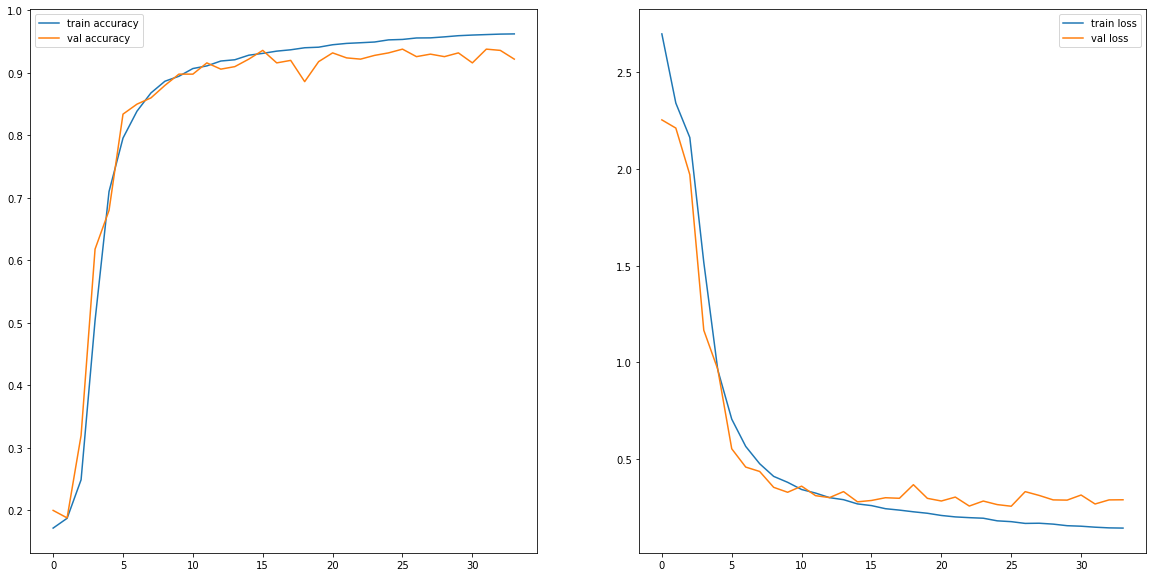

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='train accuracy')
plt.plot(val_acc, label='val accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()

plt.show()

In [ ]:
Result71 = model.predict(X_test1)

782/782 [==============================] - 6s 7ms/step


In [ ]:
Result71

array([[3.7686227e-06, 6.7508554e-05, 5.9609533e-06, ..., 1.3752549e-05,
        9.0398435e-06, 1.0415533e-04],
       [1.3526073e-06, 1.1354967e-04, 1.9547979e-06, ..., 1.3913503e-07,
        3.2334058e-06, 3.9816314e-06],
       [1.9580457e-07, 9.9955291e-01, 1.3612351e-06, ..., 4.3900768e-04,
        7.9650448e-08, 5.3981122e-08],
       ...,
       [9.9999821e-01, 3.2301224e-07, 5.2307452e-09, ..., 3.6127972e-09,
        1.4787555e-08, 1.0200450e-06],
       [3.0206452e-06, 1.3434523e-05, 6.8961344e-05, ..., 1.3314886e-06,
        2.1557305e-05, 9.9976927e-01],
       [1.3223581e-07, 2.4796667e-04, 9.9963510e-01, ..., 2.2436450e-06,
        2.0167083e-06, 3.5843843e-06]], dtype=float32)

In [ ]:
df = pd.DataFrame(data={'Id': [i for i in range(len(Result71))], 'Category': np.argmax(Result71, axis=1)})

In [ ]:
df

Id  Category
0          0         5
1          1         4
2          2         1
3          3         1
4          4         6
...      ...       ...
24995  24995         1
24996  24996         1
24997  24997         0
24998  24998         9
24999  24999         2

[25000 rows x 2 columns]

In [ ]:
df.to_csv('pies_submission71.csv', index=False)

####**WideResNet 28-10 7.2 full not aug**

In [ ]:
#from keras import layers, Model

In [ ]:
keras.backend.clear_session()

def model_WRN_28_10(input_shape, num_classes=10):
    inputs = keras.Input(shape=input_shape,name="WRN_28_10")

    # 1st block
    x = layers.Conv2D(32,(3, 3), activation='relu',name="Conv2D_1")(inputs)
    x = layers.BatchNormalization(name='BatchNormalization_1')(x)

    activation_1 = layers.Activation('relu', name='Activation_1')(x)

    x = layers.Conv2D(32,(3, 3), activation='relu',name="Conv2D_3",padding='same')(activation_1)
    x = layers.BatchNormalization(name='BatchNormalization_2')(x)
    x = layers.Activation('relu', name='Activation_2')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_4",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_3')(x)
    x = layers.Activation('relu', name='Activation_3')(x)

    conv2D_2 = layers.Conv2D(64,(5, 5), activation='relu',name="Conv2D_2",padding='same')(activation_1)

    merge_1 = layers.add([conv2D_2, x])


    # 2nd block
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_5",padding='same')(merge_1)
    x = layers.BatchNormalization(name='BatchNormalization_4')(x)
    x = layers.Activation('relu', name='Activation_4')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_6",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_5')(x)
    x = layers.Activation('relu', name='Activation_5')(x)

    merge_2 = layers.add([merge_1, x])

    # 3rd block
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_7",padding='same')(merge_2)
    x = layers.BatchNormalization(name='BatchNormalization_6')(x)
    x = layers.Activation('relu', name='Activation_6')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_8",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_7')(x)
    x = layers.Activation('relu', name='Activation_7')(x)

    merge_3 = layers.add([merge_2, x])

    # 4th block
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_9",padding='same')(merge_3)
    x = layers.BatchNormalization(name='BatchNormalization_8')(x)
    x = layers.Activation('relu', name='Activation_8')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_10",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_9')(x)
    x = layers.Activation('relu', name='Activation_9')(x)

    merge_4 = layers.add([merge_3, x])

    # 5th block
    max_pooling2D_1 = layers.MaxPooling2D((3,3),name="MaxPooling_1")(merge_4)

    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_12",padding='same')(max_pooling2D_1)
    x = layers.BatchNormalization(name='BatchNormalization_10')(x)
    x = layers.Activation('relu', name='Activation_10')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_13",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_11')(x)
    x = layers.Activation('relu', name='Activation_11')(x)

    conv2D_11 = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_11",padding='same')(max_pooling2D_1)

    merge_5 = layers.add([conv2D_11, x])


    # 6th block
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_14",padding='same')(merge_5)
    x = layers.BatchNormalization(name='BatchNormalization_12')(x)
    x = layers.Activation('relu', name='Activation_12')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_15",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_13')(x)
    x = layers.Activation('relu', name='Activation_13')(x)

    merge_6 = layers.add([merge_5, x])

    # 7th block
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_16",padding='same')(merge_6)
    x = layers.BatchNormalization(name='BatchNormalization_14')(x)
    x = layers.Activation('relu', name='Activation_14')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_17",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_15')(x)
    x = layers.Activation('relu', name='Activation_15')(x)

    merge_7 = layers.add([merge_6, x])

    # 8th block
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_18",padding='same')(merge_7)
    x = layers.BatchNormalization(name='BatchNormalization_16')(x)
    x = layers.Activation('relu', name='Activation_16')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_19",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_17')(x)
    x = layers.Activation('relu', name='Activation_17')(x)

    merge_8 = layers.add([merge_7, x])

    # 9th block
    max_pooling2D_2 = layers.MaxPooling2D((3,3),name="MaxPooling_2")(merge_8)

    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_21",padding='same')(max_pooling2D_2)
    x = layers.BatchNormalization(name='BatchNormalization_18')(x)
    x = layers.Activation('relu', name='Activation_18')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_22",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_19')(x)
    x = layers.Activation('relu', name='Activation_19')(x)

    conv2D_20 = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_20",padding='same')(max_pooling2D_2)

    merge_9 = layers.add([conv2D_20, x])

    # 10th block
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_23",padding='same')(merge_9)
    x = layers.BatchNormalization(name='BatchNormalization_20')(x)
    x = layers.Activation('relu', name='Activation_20')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_24",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_21')(x)
    x = layers.Activation('relu', name='Activation_21')(x)

    merge_10 = layers.add([merge_9, x])

    # 11th block
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_25",padding='same')(merge_10)
    x = layers.BatchNormalization(name='BatchNormalization_22')(x)
    x = layers.Activation('relu', name='Activation_22')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_26",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_23')(x)
    x = layers.Activation('relu', name='Activation_23')(x)

    merge_11 = layers.add([merge_10, x])

    # 12th block
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_27",padding='same')(merge_11)
    x = layers.BatchNormalization(name='BatchNormalization_24')(x)
    x = layers.Activation('relu', name='Activation_24')(x)
    x = layers.Conv2D(64,(3, 3), activation='relu',name="Conv2D_28",padding='same')(x)
    x = layers.BatchNormalization(name='BatchNormalization_25')(x)
    x = layers.Activation('relu', name='Activation_25')(x)

    merge_12 = layers.add([merge_11, x])

    # output block
    x = layers.GlobalAveragePooling2D(name='AVGPooling2D_1')(merge_12)
    x = layers.Flatten(name='Flatten_1')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax',name='Dense_1')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

model = model_WRN_28_10((32,32,3))

early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(lr=1e-3, amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint(
                   '/kaggle/working/best_cnn.h5',
                   save_best_only=True)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history72 = model.fit_generator(dataGenAns.flow(X_train2, y_train2, batch_size=128),
                              epochs=70, validation_data=(X_val2, y_val2),
                              callbacks=[early_stopping, model_checkpoint])

Epoch 1/70


<ipython-input-67-4e6c26dd38d8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history72 = model.fit_generator(dataGenAns.flow(X_train2, y_train2, batch_size=128),


387/387 [==============================] - 40s 94ms/step - loss: 2.6795 - accuracy: 0.1641 - val_loss: 2.2685 - val_accuracy: 0.2000
Epoch 2/70
387/387 [==============================] - 37s 94ms/step - loss: 2.3349 - accuracy: 0.1798 - val_loss: 2.2095 - val_accuracy: 0.2120
Epoch 3/70
387/387 [==============================] - 35s 90ms/step - loss: 2.2873 - accuracy: 0.1817 - val_loss: 2.2343 - val_accuracy: 0.1860
Epoch 4/70
387/387 [==============================] - 35s 91ms/step - loss: 2.1973 - accuracy: 0.2128 - val_loss: 6.9033 - val_accuracy: 0.2560
Epoch 5/70
387/387 [==============================] - 36s 92ms/step - loss: 1.8588 - accuracy: 0.3577 - val_loss: 1.4770 - val_accuracy: 0.5020
Epoch 6/70
387/387 [==============================] - 35s 92ms/step - loss: 1.2971 - accuracy: 0.5925 - val_loss: 1.1054 - val_accuracy: 0.6540
Epoch 7/70
387/387 [==============================] - 37s 94ms/step - loss: 0.9832 - accuracy: 0.7043 - val_loss: 0.7707 - val_accuracy: 0.7620
Epo

In [ ]:
train_acc = history72.history['accuracy']
val_acc = history72.history['val_accuracy']

train_loss = history72.history['loss']
val_loss = history72.history['val_loss']

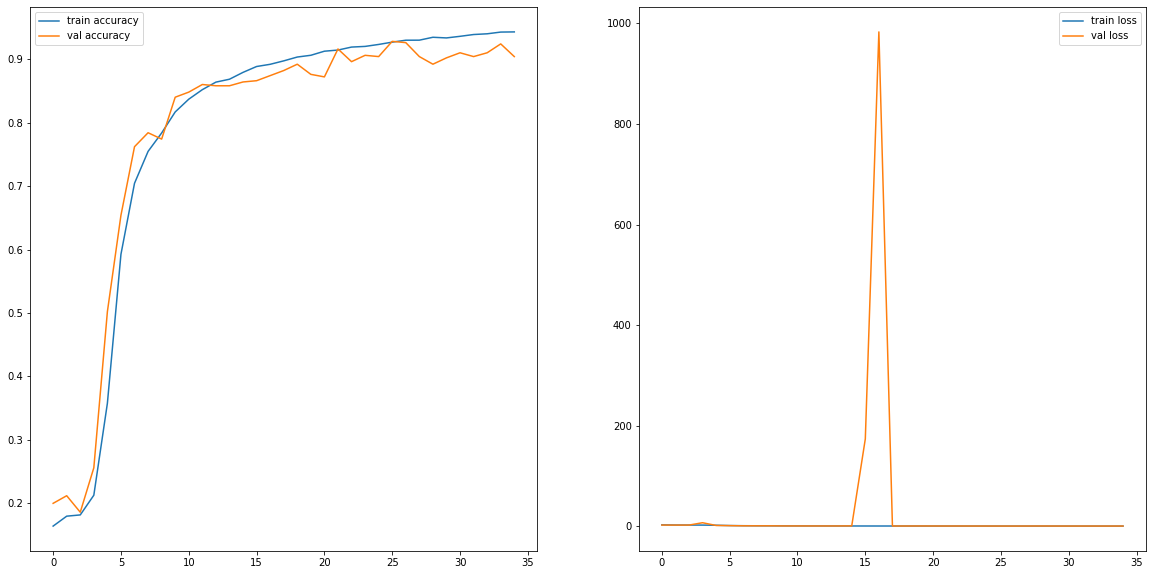

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='train accuracy')
plt.plot(val_acc, label='val accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()

plt.show()

In [ ]:
Result72 = model.predict(X_test2)

782/782 [==============================] - 6s 7ms/step


In [ ]:
Result72

array([[6.2334198e-05, 1.7860829e-04, 1.1722056e-04, ..., 2.4775973e-05,
        5.5165827e-05, 4.1505616e-04],
       [6.0676746e-03, 2.2296295e-01, 1.7202614e-02, ..., 8.6418036e-03,
        6.2287385e-03, 8.6633069e-03],
       [5.2221068e-05, 9.9941456e-01, 1.2689267e-04, ..., 5.9338785e-05,
        6.4634703e-05, 2.8281360e-05],
       ...,
       [9.9863678e-01, 1.2985399e-04, 2.0627143e-05, ..., 4.6264056e-05,
        9.5860705e-05, 9.2617190e-04],
       [1.7192780e-06, 9.1820966e-06, 1.7598088e-05, ..., 1.8026542e-06,
        3.1995405e-05, 9.9965405e-01],
       [5.1098397e-09, 8.3332052e-06, 9.9997377e-01, ..., 5.4657971e-07,
        6.2413356e-08, 4.7537733e-07]], dtype=float32)

In [ ]:
df = pd.DataFrame(data={'Id': [i for i in range(len(Result72))], 'Category': np.argmax(Result72, axis=1)})

In [ ]:
df

Id  Category
0          0         5
1          1         4
2          2         1
3          3         1
4          4         6
...      ...       ...
24995  24995         1
24996  24996         1
24997  24997         0
24998  24998         9
24999  24999         2

[25000 rows x 2 columns]

In [ ]:
df.to_csv('pies_submission72.csv', index=False)

##**Researches Part 2**

####**Researches: Model Parameters**

**Наилучшими параметрами нейросеток были оптимизатор - Adam, lr = e-3. БЫли проведены определенные исследования из которых можно сделать некоторые выводы: оптимизатор SGD показал себя хуже, чем Adam; мы пробовали lr=e-2, данные небольшие ииследования показали, что наилучшими параметрами модели в нашей работе являются оптимизатор Adam и lr=e-3.**

##**Conclusion**

**Таким образом, мы получили такую точность: 93.5 на ConvNet 1 with Data Generator - dataGenAns1.** **Мы попробовали различные виды аугментаций, в том числе AutoAugment. Были проведены исследования, так же нашей команде удалось пройти все checkpoint на kaggle.**

**Спасибо за проявленное внмиание!**